## 1. <u>Problem Statement:</u>
### <span style="color: blue;"> To create a predictive model by applying some data science techniques which can predict the employee performance based on factors as inputs( the available independent variables), that should help the CEO, Mr. Brain to understand non performing employees and will use to hire potential employees based on complete analysis and  insights.

### <span style="color: blue;"> INX Future Inc Employee Performance - Project
#### Assessment ID:- E10901-PR2-V18

## 2. <u>Importing Libraries</u>

In [3]:
#Data Analysis and Data Wrangling
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

#Data Imbalance Treratment Libraries
from imblearn.over_sampling import SMOTE

#Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, make_scorer
from sklearn.metrics import cohen_kappa_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

from itertools import cycle
from sklearn.utils.class_weight import compute_sample_weight


In [4]:
pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ---------------- --------------------- 41.0/96.5 kB 393.8 kB/s eta 0:00:01
     ---------------- --------------------- 41.0/96.5 kB 393.8 kB/s eta 0:00:01
     ------------------------ ------------- 61.4/96.5 kB 409.6 kB/s eta 0:00:01
     -------------------------------- ----- 81.9/96.5 kB 353.1 kB/s eta 0:00:01
     ------------------------------------ - 92.2/96.5 kB 327.7 kB/s eta 0:00:01
     ------------------------------------ - 92.2/96.5 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 96.5/96.5 kB 276.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## 2. <u>Load the data:</u>
- After installing Excel packages, now my system is ready to import the datas.

In [4]:
epa= pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
epa

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

## 3. <u>Domain Analysis</u>


#### It's a comprehensive Data Science Project aimed at understanding and addressing the performance issues at INX Future Inc.  The dataset contain information about employees, including various attributes related to their personal and professional lives. Here's a brief domain analysis:
1. Employee Information:-
    - EmpNumber: Unique identifier for each employee.
    - Age: Age of the employee.
    - Gender: Gender of the employee.
    - EducationBackground: Educational background of the employee.
    - MaritalStatus: Marital status of the employee.
2. Professional Details:-
    - EmpDepartment: Department in which the employee works (e.g., Sales, Human Resources, Development, Data Science).
    - EmpJobRole: Specific job role within the department.
    - BusinessTravelFrequency: Frequency of business travel (e.g., Travel_Rarely, Travel_Frequently).
    - DistanceFromHome: Distance of the employee's residence from the workplace.
3. Education and Experience:-
    - EmpEducationLevel: Education level of the employee.
    - TotalWorkExperienceInYears: Total work experience of the employee.
    - TrainingTimesLastYear: Number of training sessions attended by the employee in the last year.
    - EmpWorkLifeBalance: Work-life balance as perceived by the employee.
    - ExperienceYearsAtThisCompany: Years of experience at the current company.
    - ExperienceYearsInCurrentRole: Years of experience in the current job role.
    - YearsSinceLastPromotion: Years since the last promotion.
    - YearsWithCurrManager: Years working with the current manager.
	
- Some data definitions are:
    - EmpEducationLevel	{1: 'Below College',2: 'College',3:'Bachelor', 4: 'Master',5 :'Doctor'}
	
    - EmpEnvironmentSatisfaction {1 :'Low', 2:'Medium', 3: 'High', 4 :'Very High'}
	
    - EmpJobInvolvement	{1: 'Low', 2: 'Medium',3: 'High', 4 :'Very High'}
	
    - EmpJobSatisfaction {1 :'Low', 2: 'Medium', 3:'High', 4: 'Very High'}
	
    - PerformanceRating	{ 2: 'Good', 3 :'Excellent', 4: 'Outstanding'}
	
    - RelationshipSatisfaction {1: 'Low', 2: 'Medium', 3: 'High', 4 :'Very High'}
	
    - EmpWorkLifeBalance {1 :'Bad', 2: 'Good', 3 :'Better', 4 :'Best'}

## 4. <u>Basic Checks / Exploring the dataset</u>

In [5]:
#check first five rows
epa.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [6]:
#check last five rows
epa.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [7]:
# Display a random sample of the DataFrame
epa.sample(5)

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
560  E1002002   40  Female       Life Sciences       Married   
0    E1001000   32    Male           Marketing        Single   
116  E1001217   33    Male               Other        Single   
604  E1002076   33    Male       Life Sciences       Married   
108  E1001202   36    Male       Life Sciences       Married   

              EmpDepartment              EmpJobRole BusinessTravelFrequency  \
560  Research & Development  Manufacturing Director           Travel_Rarely   
0                     Sales         Sales Executive           Travel_Rarely   
116             Development        Senior Developer           Travel_Rarely   
604  Research & Development      Research Scientist           Travel_Rarely   
108            Data Science          Data Scientist           Travel_Rarely   

     DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
560                 8                  2  ...                            2   
0                  10                  3  ...                            4   
116                 1                  4  ...                            2   
604                 8                  4  ...                            2   
108                14                  1  ...                            1   

     TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
560                          18                      3                   3   
0                            10                      2                   2   
116                           6                      1                   3   
604                          14                      1                   3   
108                          17                      2                   2   

     ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
560                             1                             0   
0                              10                             7   
116                             3                             2   
604                            10                             8   
108                            16                             8   

    YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
560                       0                     0         No   
0                         0                     8         No   
116                       0                     2         No   
604                       7                     6         No   
108                       4                    11         No   

     PerformanceRating  
560                  3  
0                    3  
116                  3  
604                  3  
108                  3  

[5 rows x 28 columns]

In [8]:
#check the no. of rows and columns in a dataset
epa.shape

(1200, 28)

### <u>Insights:
    - We have a dataset of 1200 rows and 28 features.

In [9]:
#check characteristic and memory usage of data.
epa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

### <u>Insights:</u>
- The info() method gives us insights into the structure and characteristics of dataset.
- Data Types: The dataset contains both numerical (int64) and object (categorical) data types.
- Numerical columns include various attributes such as Age, DistanceFromHome, EmpEducationLevel, and others.
- Object columns typically represent categorical variables and may include strings or other non-numeric types.
- Non-Null Counts: All columns have 1200 non-null entries, indicating that there are no missing values in any of the columns.
- Memory Usage:The memory usage of the DataFrame is approximately 262.6 KB.
- Categorical Columns: Object columns include various categorical attributes such as EmpNumber, Gender, EducationBackground, and others. The column 'PerformanceRating' appears to be the target variable, representing the performance rating of employees. This is a discrete variable, indicating that it is a <u>Multi-class Classification Problem.

In [10]:
# Display data types of each column
epa.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

### <u>Insights:
    - Categorical variables include identifiers (e.g., EmpNumber), gender, education background, marital status, department, job role, business travel frequency, and attrition.
    - Numerical variables include age, distances, education level, satisfaction levels, salary hike percentage, work experience, training times, and various experience-related metrics.
    

In [11]:
# Display summary statistics for numerical columns
epa.describe().T

count       mean        std   min   25%   50%  \
Age                           1200.0  36.918333   9.087289  18.0  30.0  36.0   
DistanceFromHome              1200.0   9.165833   8.176636   1.0   2.0   7.0   
EmpEducationLevel             1200.0   2.892500   1.044120   1.0   2.0   3.0   
EmpEnvironmentSatisfaction    1200.0   2.715833   1.090599   1.0   2.0   3.0   
EmpHourlyRate                 1200.0  65.981667  20.211302  30.0  48.0  66.0   
EmpJobInvolvement             1200.0   2.731667   0.707164   1.0   2.0   3.0   
EmpJobLevel                   1200.0   2.067500   1.107836   1.0   1.0   2.0   
EmpJobSatisfaction            1200.0   2.732500   1.100888   1.0   2.0   3.0   
NumCompaniesWorked            1200.0   2.665000   2.469384   0.0   1.0   2.0   
EmpLastSalaryHikePercent      1200.0  15.222500   3.625918  11.0  12.0  14.0   
EmpRelationshipSatisfaction   1200.0   2.725000   1.075642   1.0   2.0   3.0   
TotalWorkExperienceInYears    1200.0  11.330000   7.797228   0.0   6.0  10.0   
TrainingTimesLastYear         1200.0   2.785833   1.263446   0.0   2.0   3.0   
EmpWorkLifeBalance            1200.0   2.744167   0.699374   1.0   2.0   3.0   
ExperienceYearsAtThisCompany  1200.0   7.077500   6.236899   0.0   3.0   5.0   
ExperienceYearsInCurrentRole  1200.0   4.291667   3.613744   0.0   2.0   3.0   
YearsSinceLastPromotion       1200.0   2.194167   3.221560   0.0   0.0   1.0   
YearsWithCurrManager          1200.0   4.105000   3.541576   0.0   2.0   3.0   
PerformanceRating             1200.0   2.948333   0.518866   2.0   3.0   3.0   

                               75%    max  
Age                           43.0   60.0  
DistanceFromHome              14.0   29.0  
EmpEducationLevel              4.0    5.0  
EmpEnvironmentSatisfaction     4.0    4.0  
EmpHourlyRate                 83.0  100.0  
EmpJobInvolvement              3.0    4.0  
EmpJobLevel                    3.0    5.0  
EmpJobSatisfaction             4.0    4.0  
NumCompaniesWorked             4.0    9.0  
EmpLastSalaryHikePercent      18.0   25.0  
EmpRelationshipSatisfaction    4.0    4.0  
TotalWorkExperienceInYears    15.0   40.0  
TrainingTimesLastYear          3.0    6.0  
EmpWorkLifeBalance             3.0    4.0  
ExperienceYearsAtThisCompany  10.0   40.0  
ExperienceYearsInCurrentRole   7.0   18.0  
YearsSinceLastPromotion        3.0   15.0  
YearsWithCurrManager           7.0   17.0  
PerformanceRating              3.0    4.0

### <u>Insights:
    - The age distribution of employees ranges from 18 to 60 years, with a mean age of around 37 years.
    - The average distance from home to the workplace is around 9.17 units, with variation across employees.
    - The employees have varying levels of education, with an average education level around 3, means most of them qualifications are bachelors.
    - The average performance rating is around 2.95, with a majority of employees having a rating of 3(Excellent).
    - Similar interpretations can be made for the other variables, including satisfaction levels, job-related metrics, work experience, training times, work-life balance, etc.

In [12]:
# Check for duplicate rows in the entire DataFrame
print("Number of duplicate rows:", epa.duplicated().sum())

Number of duplicate rows: 0


In [13]:
# Check for missing values in each column
epa.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [14]:
epa.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [15]:
# Display count of unique values in each column
for column in epa.columns:
    print(f"Number of unique values in {column}: {epa[column].nunique()}")

Number of unique values in EmpNumber: 1200
Number of unique values in Age: 43
Number of unique values in Gender: 2
Number of unique values in EducationBackground: 6
Number of unique values in MaritalStatus: 3
Number of unique values in EmpDepartment: 6
Number of unique values in EmpJobRole: 19
Number of unique values in BusinessTravelFrequency: 3
Number of unique values in DistanceFromHome: 29
Number of unique values in EmpEducationLevel: 5
Number of unique values in EmpEnvironmentSatisfaction: 4
Number of unique values in EmpHourlyRate: 71
Number of unique values in EmpJobInvolvement: 4
Number of unique values in EmpJobLevel: 5
Number of unique values in EmpJobSatisfaction: 4
Number of unique values in NumCompaniesWorked: 10
Number of unique values in OverTime: 2
Number of unique values in EmpLastSalaryHikePercent: 15
Number of unique values in EmpRelationshipSatisfaction: 4
Number of unique values in TotalWorkExperienceInYears: 40
Number of unique values in TrainingTimesLastYear: 7
N

### <u>Insights
    - Total 1200 employees working in a company.
    - Employees Belong to 6 varied educational departments.
    - They belong to 5 varied employee education level.
    - Provided with 3 categories of Performance Ratings.

In [16]:
# Display unique values in categorical columns
for column in epa.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {epa[column].unique()}")

Unique values in EmpNumber: ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Unique values in Gender: ['Male' 'Female']
Unique values in EducationBackground: ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
Unique values in MaritalStatus: ['Single' 'Married' 'Divorced']
Unique values in EmpDepartment: ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
Unique values in EmpJobRole: ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
Unique values in BusinessTravelFrequency: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in OverTime: ['No' 'Yes']
Unique values

In [17]:
# find count of output column/ target
value_count=epa.PerformanceRating.value_counts()
value_count

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

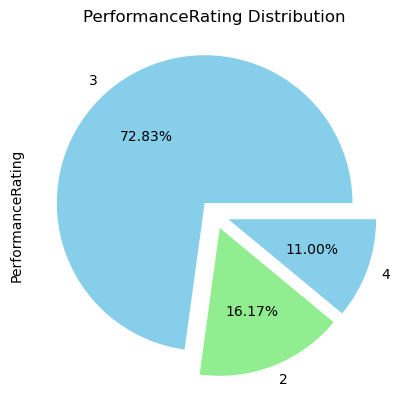

In [18]:
# Assuming value_count is a Pandas Series containing the value counts of the target column
explode = [0.1] * len(value_count)  # Adjust the values based on how much we want to explode each wedge

# Define colors for each wedge
colors = ['skyblue','lightgreen' ] 
value_count.plot.pie(autopct='%.2f%%', explode=explode, colors=colors)  # Plotting an exploded pie chart

plt.title('PerformanceRating Distribution')

plt.show()

### <u>Insights:
    - Data is highly imbalanced. We need to use SMOTE technique before building the model to make the classess balanced, and which can contribute to accurate prediction.

## 5. <u>EDA (Exploratory Data Analysis)</u>

- In the initial phase of Exploratory Data Analysis (EDA), I categorized the features into three groups based on their data types:
    1. Numerical-continuous data,
    2. Numerical-discrete data, and
    3. Categorical data.
- Varied plots are employed to ensure precision and efficiency in the visualization process. This categorization helps in selecting the most appropriate visualization methods with the nature of the data, ultimately enhancing the interpretability and insights derived from the exploratory analysis.


In [19]:
# List of numerical-continuous columns
data1 = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent',
                                'TotalWorkExperienceInYears','TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
                                'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# List of numerical-discrete columns
data2 = ['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
                              'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
                              'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance', 'PerformanceRating']

# List of categorical columns
data3 = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
                        'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

# Displaying the categorization
print("Numerical-Continuous Columns:")
print(data1)
print("\nNumerical-Discrete Columns:")
print(data2)
print("\nCategorical Columns:")
print(data3)

Numerical-Continuous Columns:
['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Numerical-Discrete Columns:
['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance', 'PerformanceRating']

Categorical Columns:
['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


## 5.1 <u>Univariate Analysis

### 5.1(a) <u>Numerical-Continuous data</u>
### <u>Histogram Plot:</u>

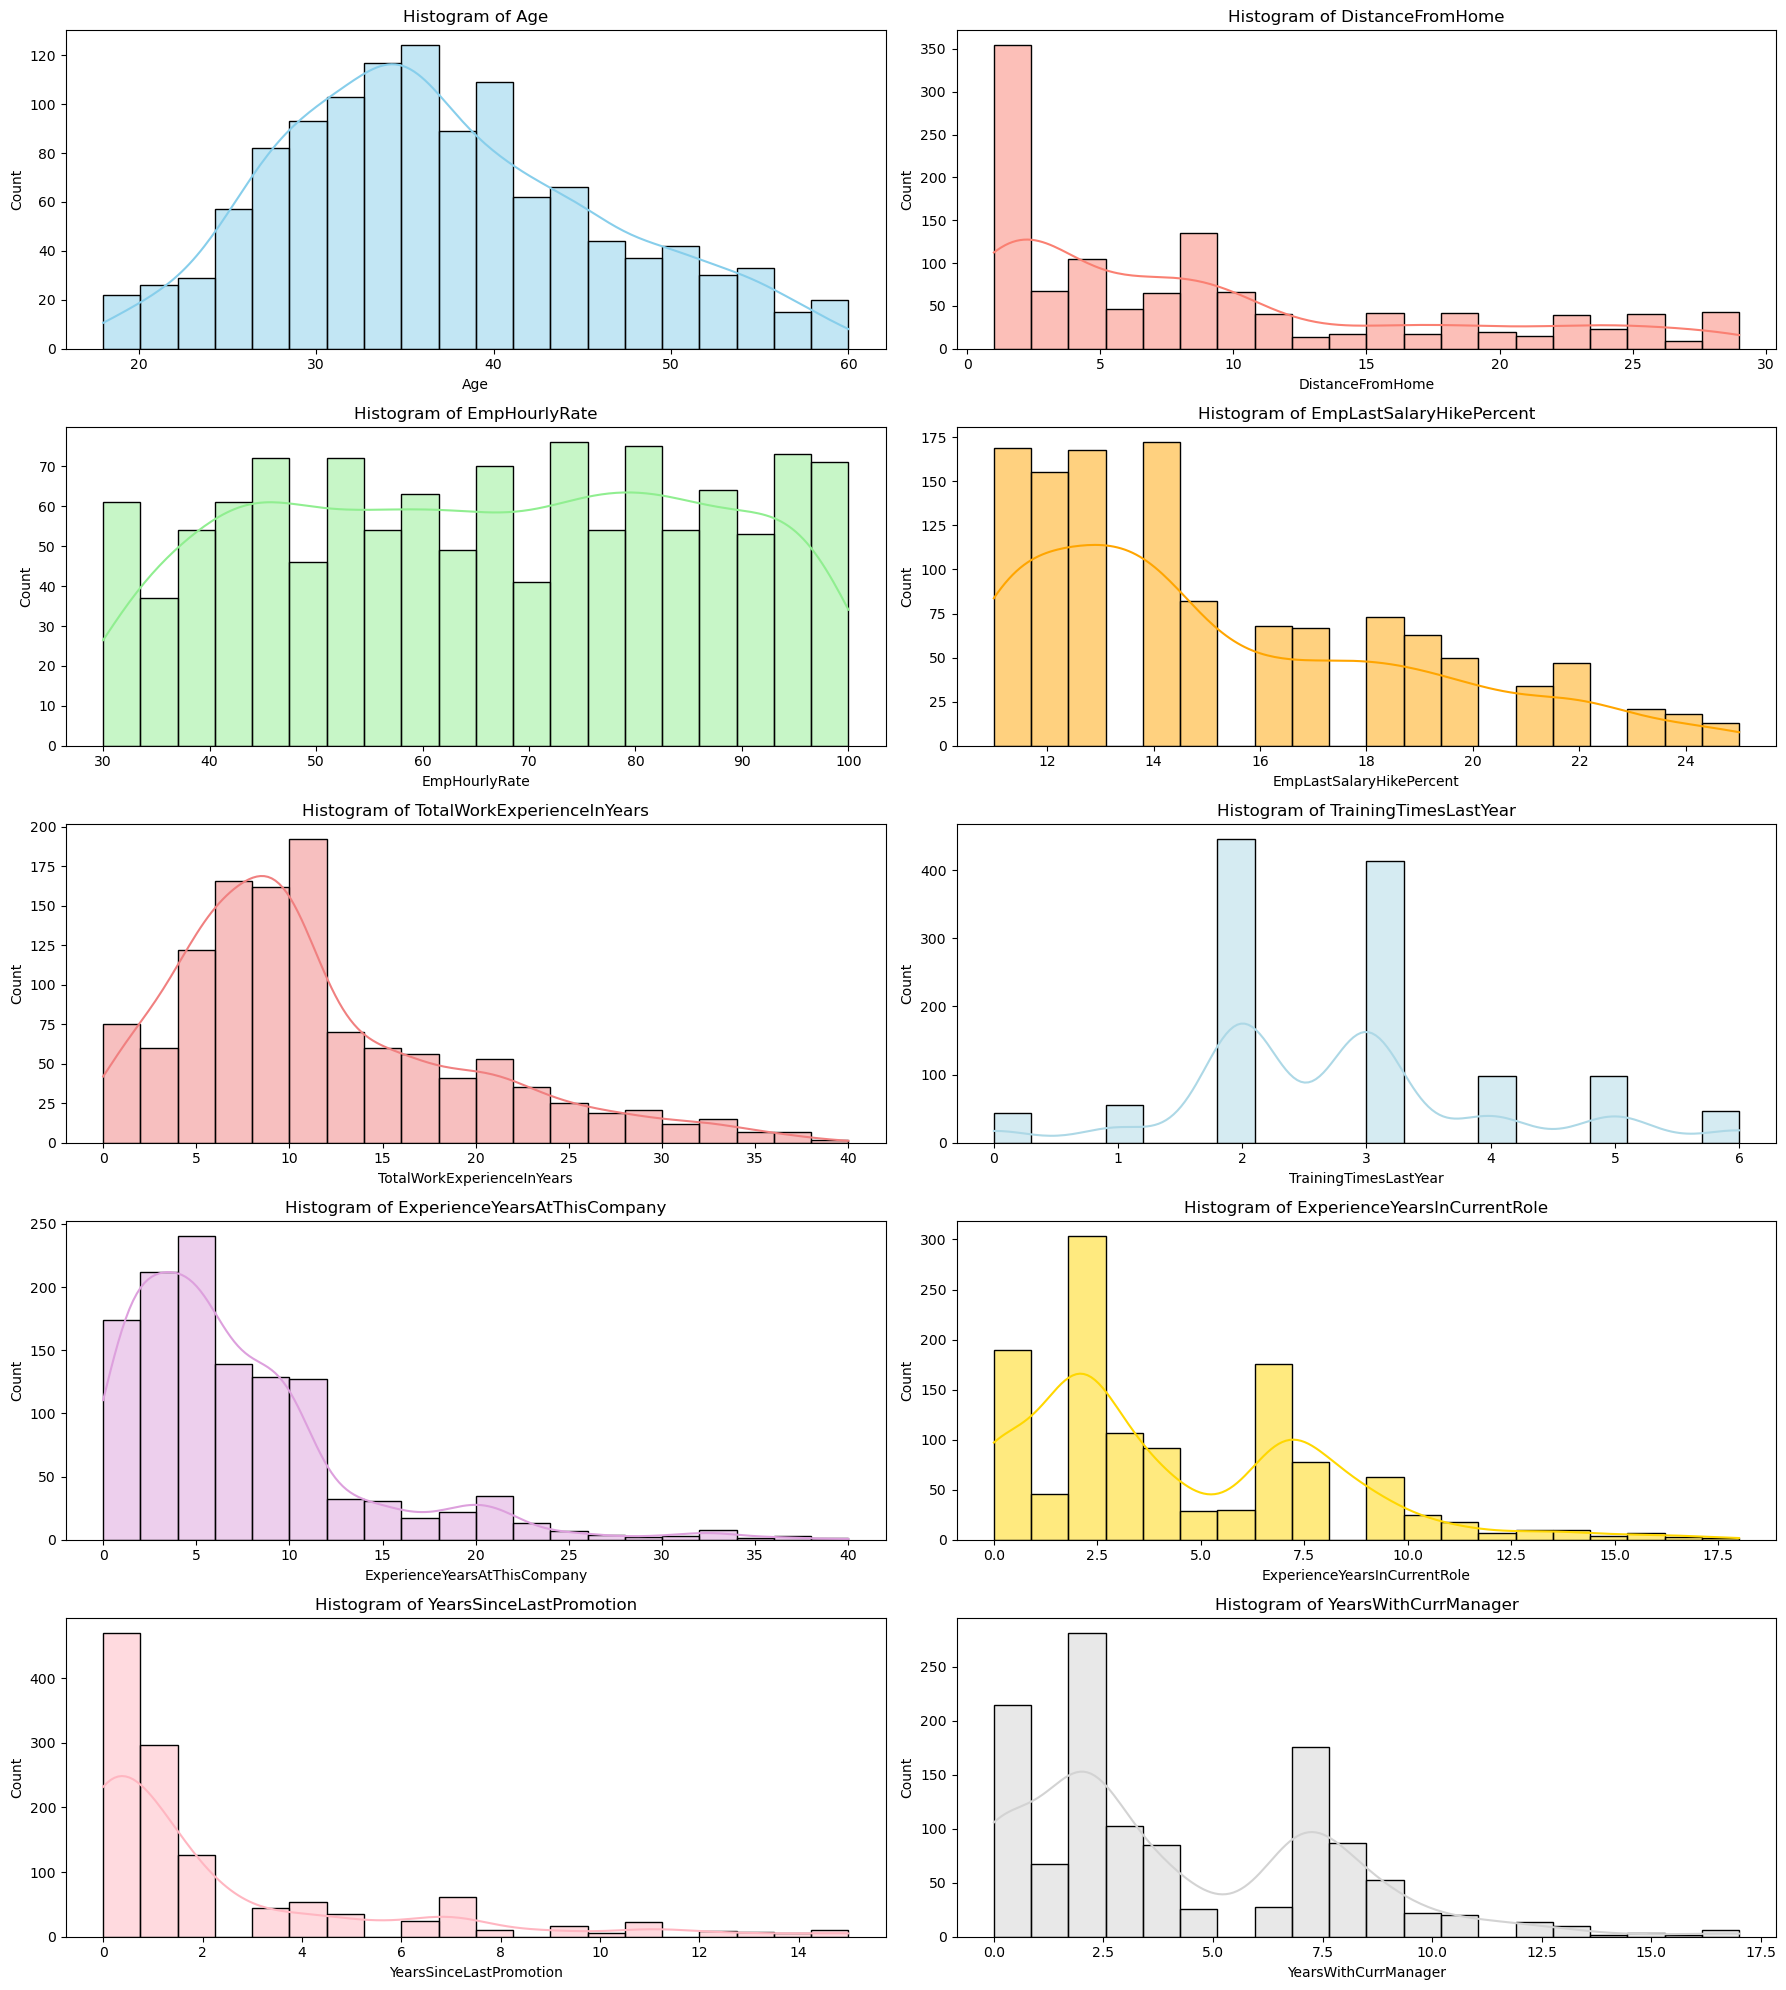

In [23]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Define a color palette (We can choose our own colors)
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral',
          'lightblue', 'plum', 'gold', 'lightpink', 'lightgrey']

# Plot histograms with color
for i, column in enumerate(data1):
    sns.histplot(epa[column], bins=20, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

### <u>Insights:</u>
- The most common age-range among employees in the company is 30 to 40 years. Positively skewness indicate that there are slightly more individuals with middle-ages in the dataset, and as age increases, the frequency of individuals decreases. The most common age among employees in the dataset is 34 with 71 employees followed with 35 with 64 employees, and so on.
- Employees in the company tend to have shorter distances from home, with a gradual decrease in employees as the distance increases, means less employee comes from distant places.
- EmpHourlyRate" distribution is relatively balanced, with a variety of hourly rates and no pronounced skewness in either direction. It seems there is a relatively even distribution across various hourly rates.
- The "EmpLastSalaryHikePercent" column represents the percentage increase in the last salary hike for employees.The most common salary hike percentage is 14%, occurring 172 times.In summary, a significant proportion of employees in the company received moderate to lower percentage salary hikes, while higher percentage hikes are less common.
- The "TotalWorkExperienceInYears" column represents the total work experience in years for employees. The most common total work experience is 10 years,second most frequent work experience is 6 years. The distribution indicates that higher work experience values are less common, with decreasing frequencies as the experience years increase.
- The "TrainingTimesLastYear" column represents the number of training times attended by employees in the last year, The most common value for training times is 2, occurring 445 times, a significant proportion of employees attended 2 or 3 training times in the last year, while higher training frequencies are less common.
- The "ExperienceYearsAtThisCompany" column represents the number of years an employee has worked at the current company, a substantial proportion of employees have around 1 to 5 years of experience at the current company, with a right-skewed distribution indicating fewer instances of higher experience years.
- The "YearsSinceLastPromotion" column represents the number of years since an employee last received a promotion.There is a significant occurrence of 2 and 7 years since the last promotion,a substantial proportion of employees have received promotions within the last 2 years.
- The "YearsWithCurrManager" column represents the number of years an employee has been working with their current manager,  most common value is 2.5 years, major proportion of employees have been working with their current manager for a shorter period, with a right-skewed distribution indicating fewer instances of longer durations of working with the current manager.

### 5.1(b) <u>Discrete-Column</u>
### <u>Count Plot:</u>

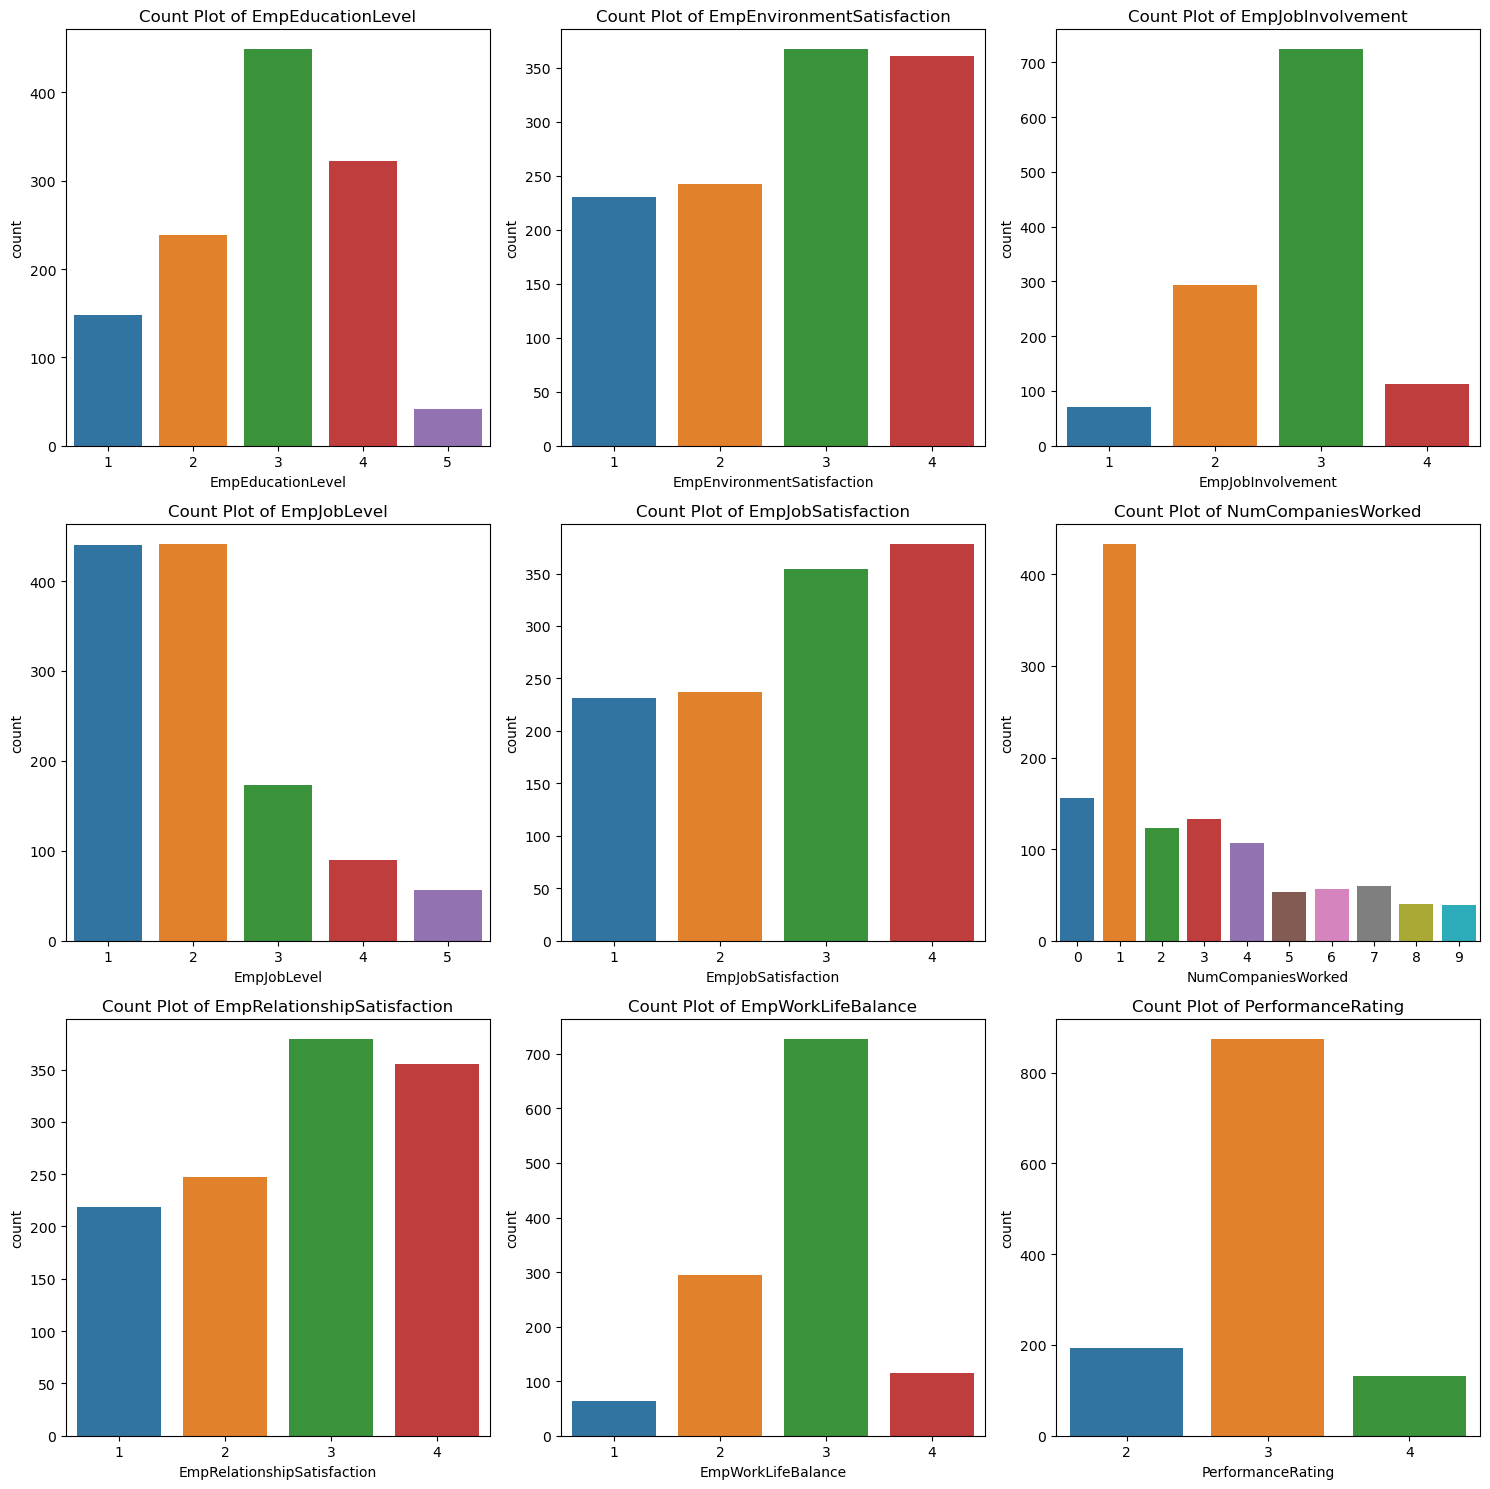

In [24]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(data2, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=epa, x=column)
    plt.title(f'Count Plot of {column}')

plt.tight_layout()
plt.show()

### <u>Insights:
- The column 'EmpEducationLevel' represents the education level of employees. Employees with an education level of 3(Graduate) are the most common, after graduation, the next most education level is masters(post graduate),least belongs to doctorate level. 
- The column 'EmpEnvironmentSatisfaction' represents the satisfaction level of employees with their work environment,satisfaction level of 3(high) are the most common, the majority of employees in the company have relatively high satisfaction levels with their work environment, with a slight tendency towards even higher satisfaction levels.
- The column 'EmpJobInvolvement' represents the job involvement level of employees, job involvement level of 3(high) are the most common, the majority of employees in the dataset have relatively high job involvement levels,.
- The column 'EmpJobLevel' represents the job level of employees, Employees with a job level of 2 and 1 are nearly equal in frequency,company has a relatively even distribution between job levels 1 and 2, and there is a moderate positive skewness, indicating a slight skew towards higher job levels.
- The column 'EmpJobSatisfaction' represents the job satisfaction levels of employees, job satisfaction level of 4 have the highest frequency, the distribution of job satisfaction levels is skewed towards a very high satisfaction levels.
- The column 'NumCompaniesWorked' represents the number of companies that employees have worked for before the current job,the most common scenario is where employees have worked for 1 company before the current job,and very less employees who have worked for more companies before the current one.
- The column 'EmpRelationshipSatisfaction' represents the level of satisfaction employees have with their relationships at the workplace. Considerable number of employees express high satisfaction(with level 3) with their relationships at the workplace.
- The column 'EmpWorkLifeBalance' represents the perceived balance between work and personal life by employees, majority of employees fall into the categories of better(level 3) work-life balance,a negative skewness implying that the majority of employees tend to perceive a higher level of work-life balance.

### 5.1(c) <u> Categorical Columns</u>
### <u>Pie-Chart Plot:</u>
    

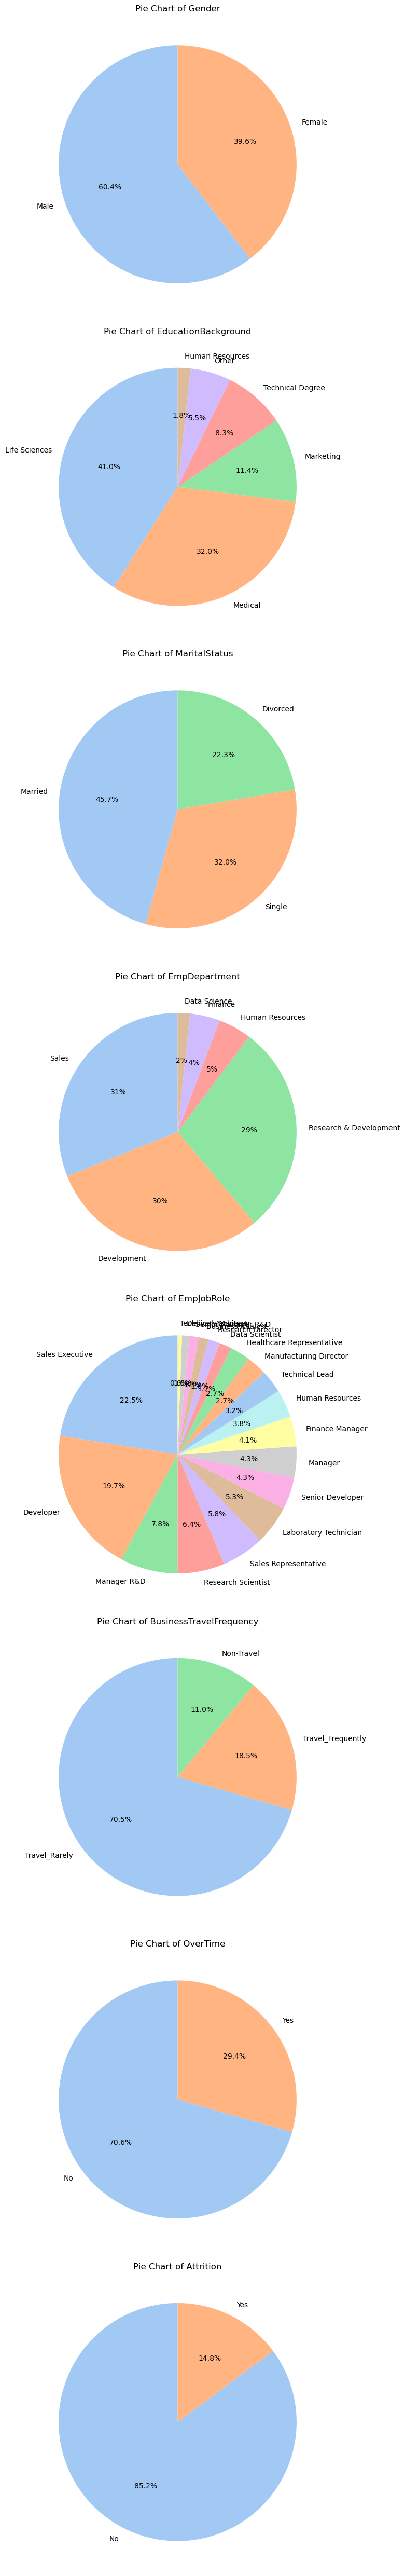

In [25]:
# Set up the figure and axes with a larger figsize
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(50, 50))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot pie charts with adjusted layout and autopct
for i, column in enumerate(data3):
    if column == 'EmpDepartment':
        epa[column].value_counts().plot.pie(autopct='%1.0f%%', startangle=90, ax=axes[i], colors=sns.color_palette("pastel"))
    else:
        epa[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[i], colors=sns.color_palette("pastel"))
    
    axes[i].set_title(f'Pie Chart of {column}')
    axes[i].set_ylabel('')  # Remove the default 'count' label

plt.tight_layout(pad=2.0)  # Increase pad for better spacing
plt.show()

### <u>Insights:</u>

- The majority of employees are male (60%), outnumbering their female counterparts.
- The predominant educational background for most employees is in Life Sciences (41%), followed by Medical (32%).
- A significant portion of the workforce in the organization is married (45.7%).
- Employees are primarily associated with the Sales department, followed by Development and R&D.
- The majority of employees hold the job role of Sales Executive, followed by Developer and Manager R&D.
- A significant portion of employees (70.5%) rarely engage in business travel.
- Only 29.4% of employees choose to work overtime.
- A notable 85.2% of employees opt to stay with the company, while a relatively small percentage choose to leave.
- The majority of employees (72.8%) are high performers, receiving a rating of 3(Excellent). The highest rating 4(outstanding) is attributed to only a few employees (11%).

## 5.2 <u>Bivariate Analysis

### 5.2(a) <u>Numerical-Continuous Columns Vs. Target Variable(PerformanceRating)</u>
### <u>Box-Plot:</u>
    

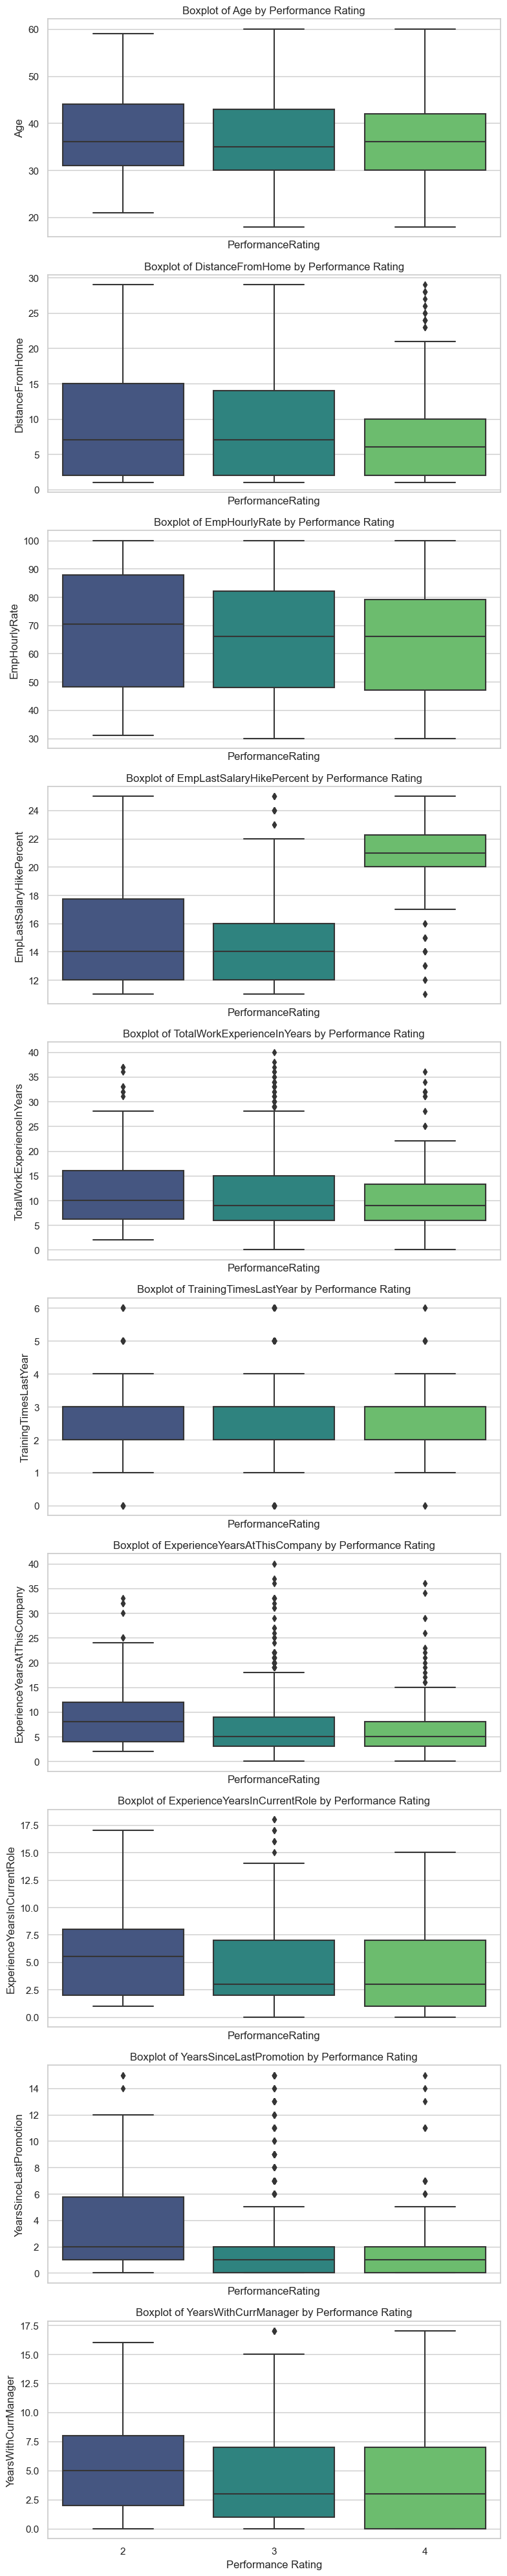

In [27]:
# Set style for better aesthetics
sns.set(style="whitegrid")

# Create subplots for each column in data1
fig, axes = plt.subplots(nrows=len(data1), ncols=1, figsize=(8, 4 * len(data1)), sharex=True)

# Iterate over each column in data1
for i, column in enumerate(data1):
    # Create a box plot for each column
    sns.boxplot(data=epa, x='PerformanceRating', y=column, ax=axes[i], palette='viridis')
    
    # Set title for each subplot
    axes[i].set_title(f'Boxplot of {column} by Performance Rating')

    # Set common xlabel for the last row
    if i == len(data1) - 1:
        axes[i].set_xlabel('Performance Rating')

    # Set common ylabel for all subplots
    axes[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

### <u>Insights:</u>
- Most of the employees from middle age group are rated as 3, very few employees are from the category of 4 which is for exceptionally outperform. In summary, diversed age group are performing well.
- Employees who stays very near to office are performing more as comparison to people stayed far,
- EmpHourlyRate datas are evenly distribute with most of the rating belong to them are 3.
- With EmpLastSalaryHikePercent distribution, we can see, with decreasing in hike, no of employees with high performer also decreases.
- Employees having average work experience are in more quantity those who performing well.
- With increasing training times last year, increased performances can be obseved.
- ExperienceYearsatThisCompany, less employees having less experience in current company are high performer, and also having an average of high experience also performs well.
- Those who are for more time involved in the current role are high performer.
- High performer those who are more been to their current manager.

### 5.2(b) <u>Numerical-Discrete Variable Vs. Target Variable(PerformanceRating)</u>
### <u>Count Plot:</u>

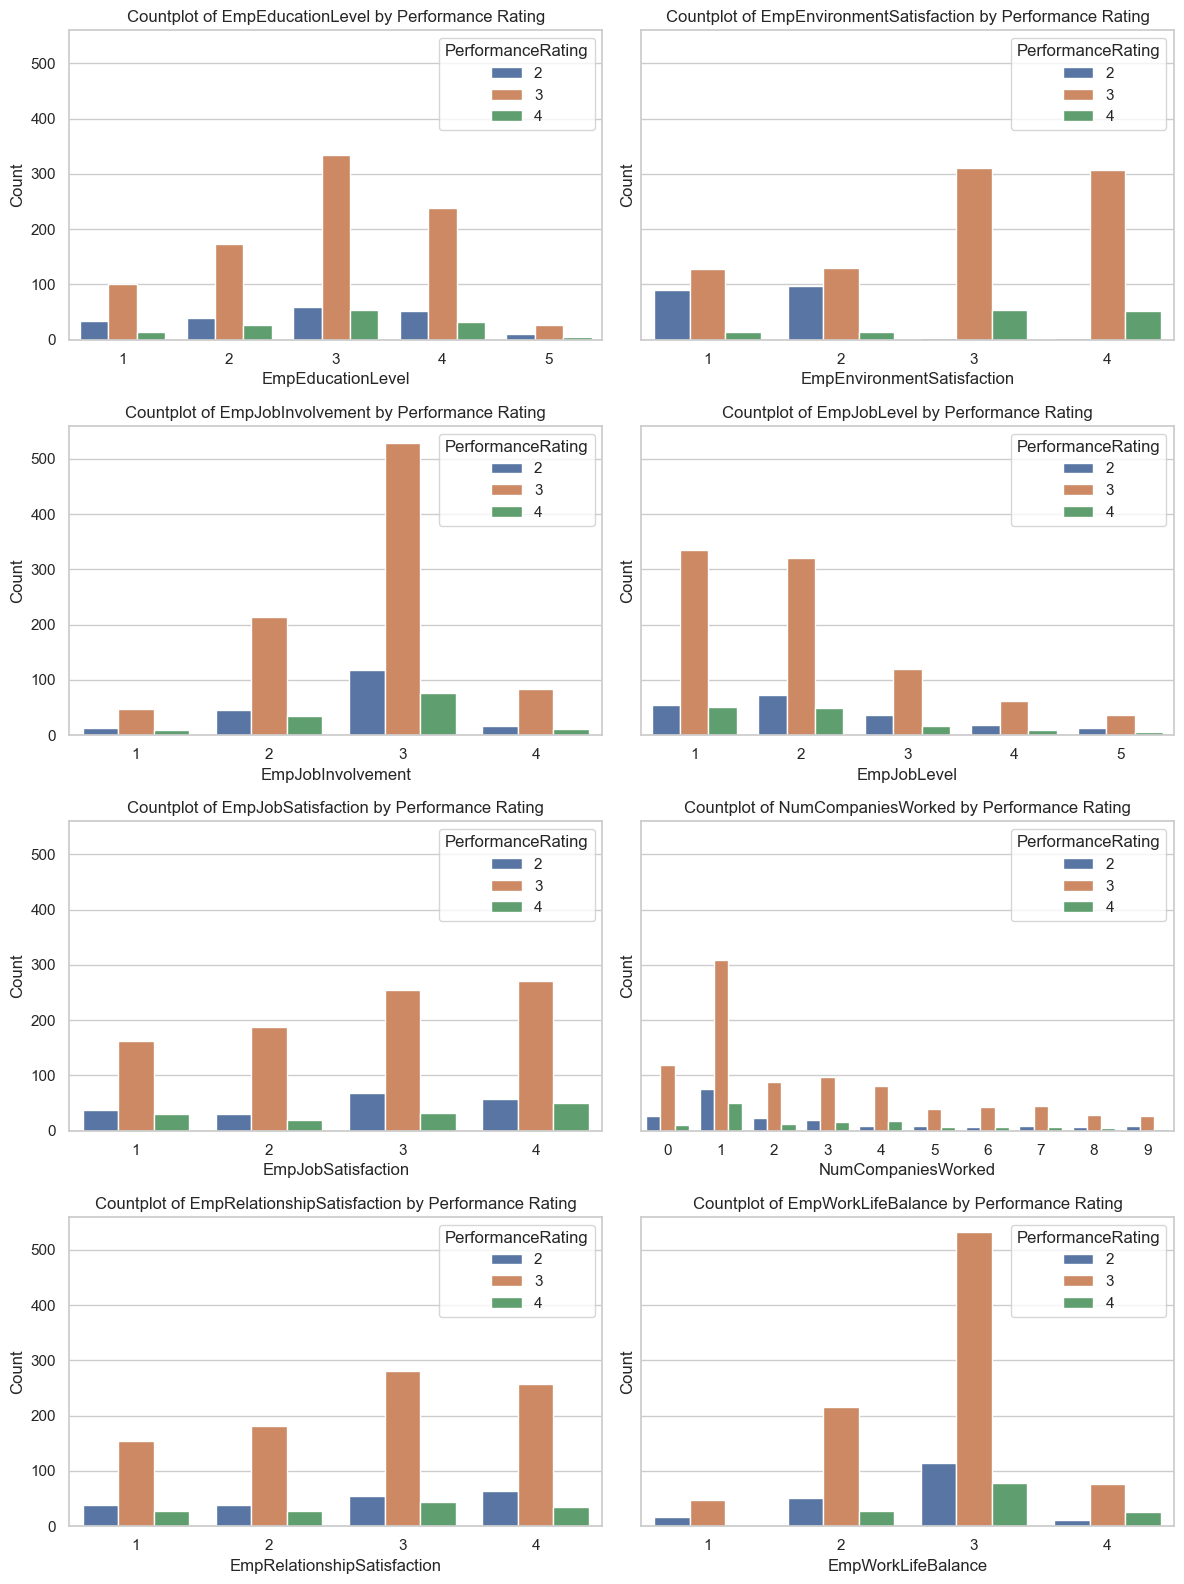

In [28]:
# Set style for better aesthetics
sns.set(style="whitegrid")

# Determine the number of rows and columns for subplots
num_cols = len(data2) - 1
num_rows = (num_cols + 1) // 2  # Add 1 to make sure all columns are covered

# Create subplots for each column in data2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows), sharey=True)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over each column in data2
for i, column in enumerate(data2):
    # Skip the subplot comparing 'PerformanceRating' against itself
    if column == 'PerformanceRating':
        continue
    
    # Create a countplot for each column
    sns.countplot(data=epa, x=column, hue='PerformanceRating', ax=axes[i], palette='deep')
    
    # Set title for each subplot
    axes[i].set_title(f'Countplot of {column} by Performance Rating')

    # Set common xlabel for the last row
    if i >= (num_cols - 1):
        axes[i].set_xlabel(column)

    # Set common ylabel for all subplots
    axes[i].set_ylabel('Count')

# Remove any extra blank subplots
for j in range(num_rows * 2, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### <u>Insights</u>
- Most of the Employees EducationLvl of 3(Graduate) and 4(post graduate) are high performer.
- Most of the employees with EnvironmentSatisfaction of 3(high) and 4(very high) are high performer.
- Most of the employees with job involvement of level 3(high) are high performers.
- Most of the employees with JOb level of 1 and 2 are high performer.
- Most of the employees with Job Satisfaction of 3(high) and 4(very high) are high performer.
- MOst of the employee who have worked with 1 company are high performer.
- MOst of the employees with relationship satisfaction of 3(high) and 4(very high) are high performer.
- Most of the employees with Worklife balance with level of 3(better) are high performer.

### 5.2(c) <u>Categorical Column Vs. Target Variable(Performance Rating)


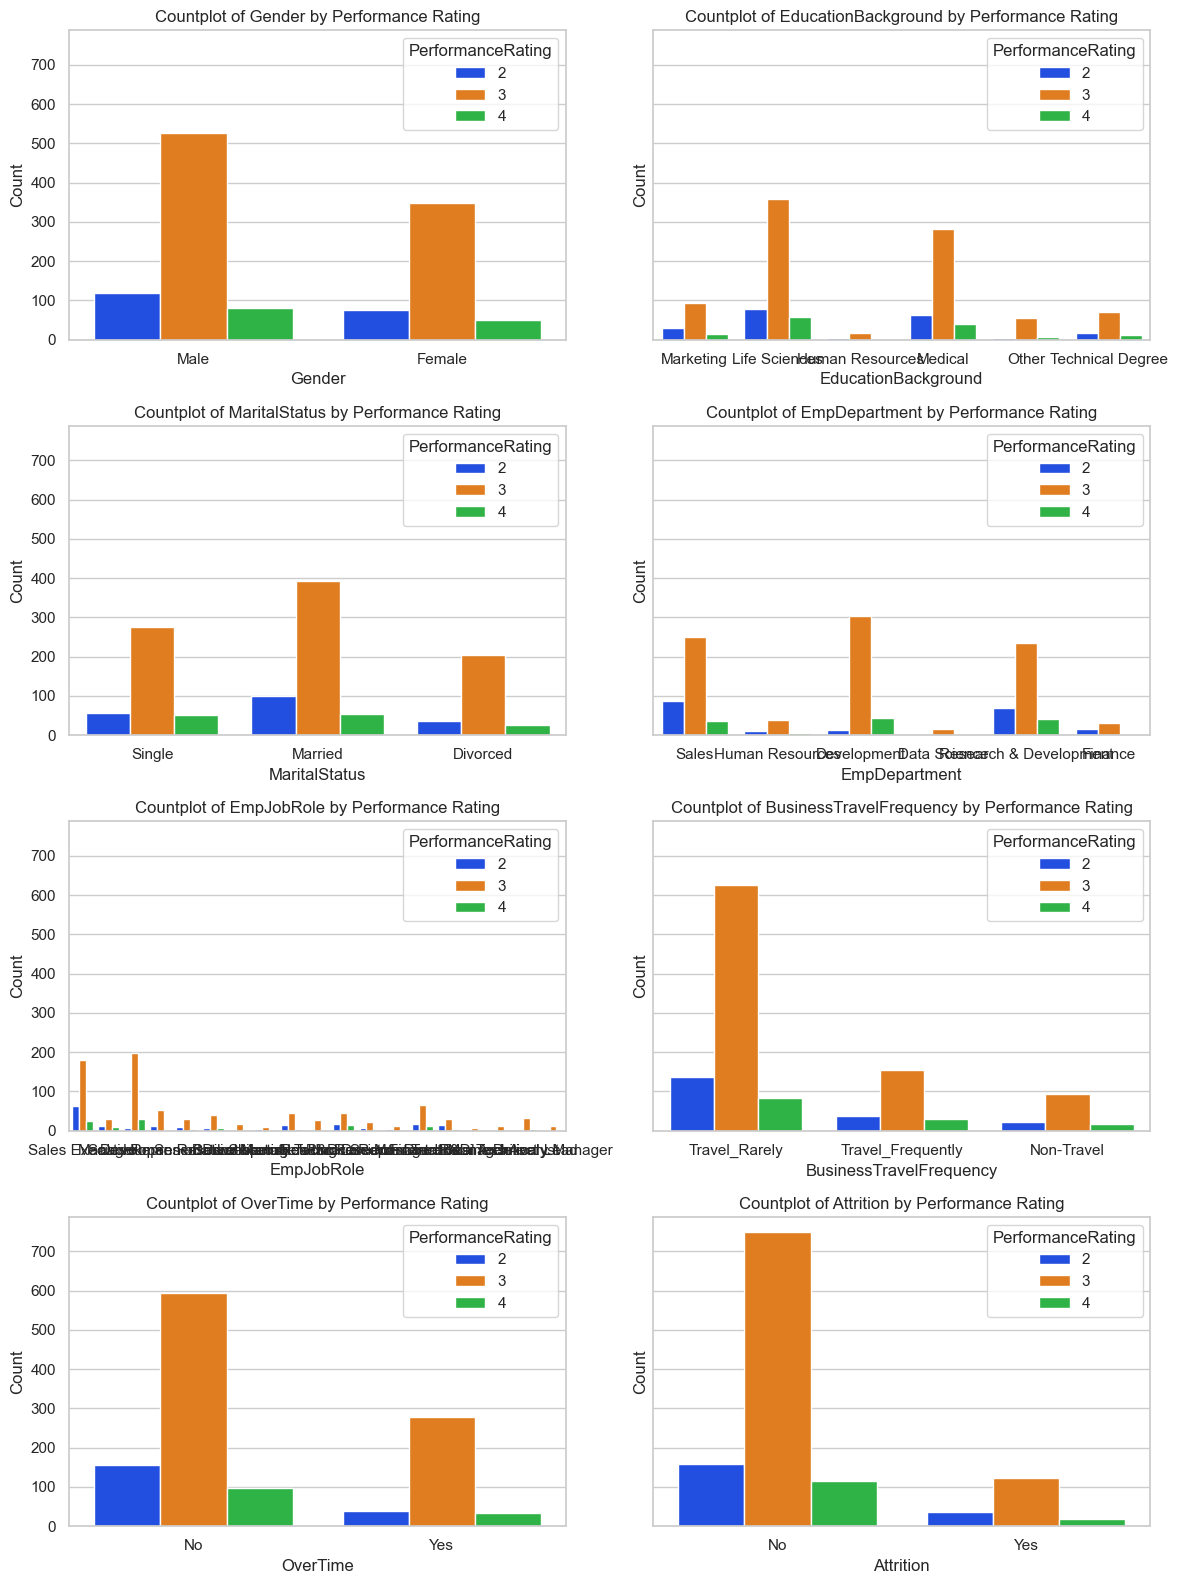

In [21]:
# Set style for better aesthetics
sns.set(style="whitegrid")

# Determine the number of rows and columns for subplots
num_rows = len(data3) // 2 + len(data3) % 2  # Add an extra row if the number of columns is odd
num_cols = 2 if len(data3) >= 2 else 1  # Use an extra column if there are more than 1 column

# Create subplots for each column in data3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows), sharey=True)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over each column in data3
for i, column in enumerate(data3):
    # Create a countplot for each column
    sns.countplot(data=epa, x=column, hue='PerformanceRating', ax=axes[i], palette='bright')
    
    # Set title for each subplot
    axes[i].set_title(f'Countplot of {column} by Performance Rating')

    # Set common xlabel for the last row
    if i >= (len(data3) - num_cols):
        axes[i].set_xlabel(column)

    # Set common ylabel for all subplots
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

### <u>Insights</u>
- Distribution among the gender, Male has dominated in higher performances comparatively.
- Employees from educational background of Life Science and Medical are found to be high performers.
- Considering Marital status of employees, married ones are high performers followed with single employees.
- EmpDepartment of Development team are high performer, followed with Sales and R&D team.
- EmpJobRole of Managerial role are high performer followed with Sales Executive.
- Business Travel Frequency of the employees, those who Travel Rarely are high performers.
- Employees who do not do overtime, are obseved to be as high performers.
- Employees those who constantly works in a same company without leaving it are found to be high performers.

## 5.3 <u>Multivariate Analysis</u>

### 5.3 (a) <u>Numerical-Continuous Features</u>
### <u>Heatmap:</u>

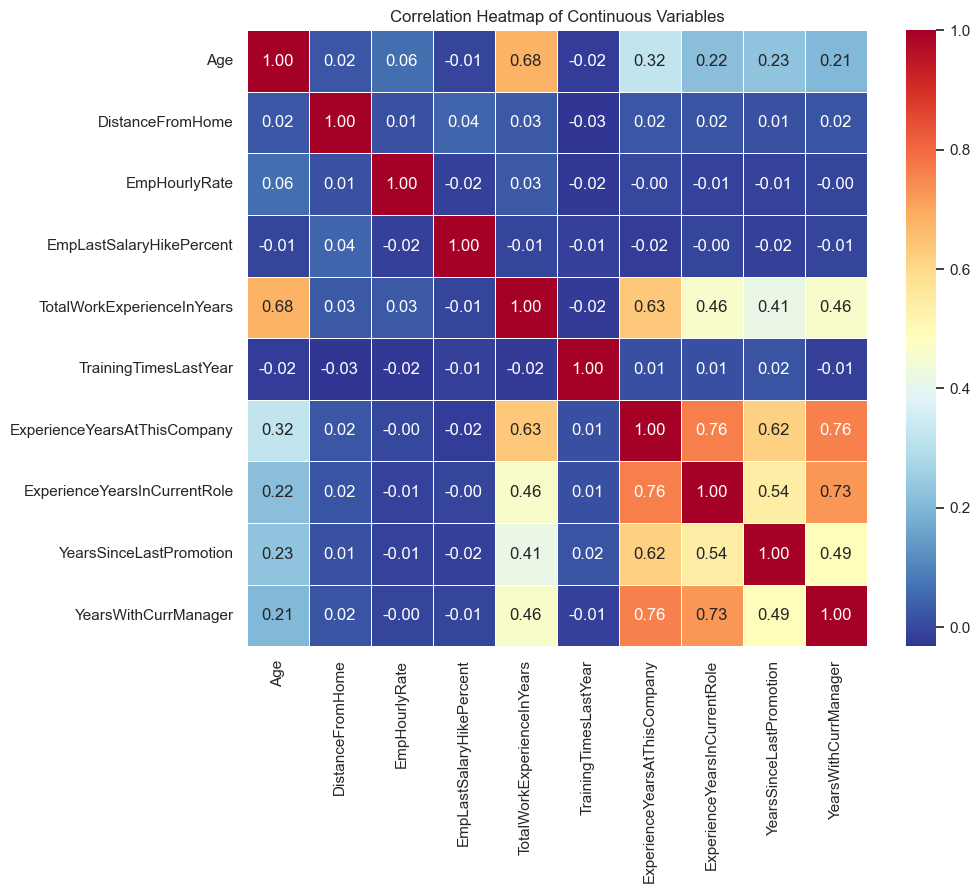

In [22]:
# Convert the list to a DataFrame
data1_df = epa[data1]

# Calculate correlation matrix
correlation_matrix = data1_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

### <u>Insights:</u>
- It's a visual square matrix where each entry represents the correlation coefficient between two variables. The values range from -1 to 1, where: 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation
- ExperienceYearsAtThisCompany and YearsWithCurrManager (0.76) having a strong positive correlation, indicating that as employees spend more years at the current company, they tend to have the same manager, but as per the context of data, am keeping these column for better analysis and insights.

### <u>All the variables w.r.t Performance Rating(target variable)

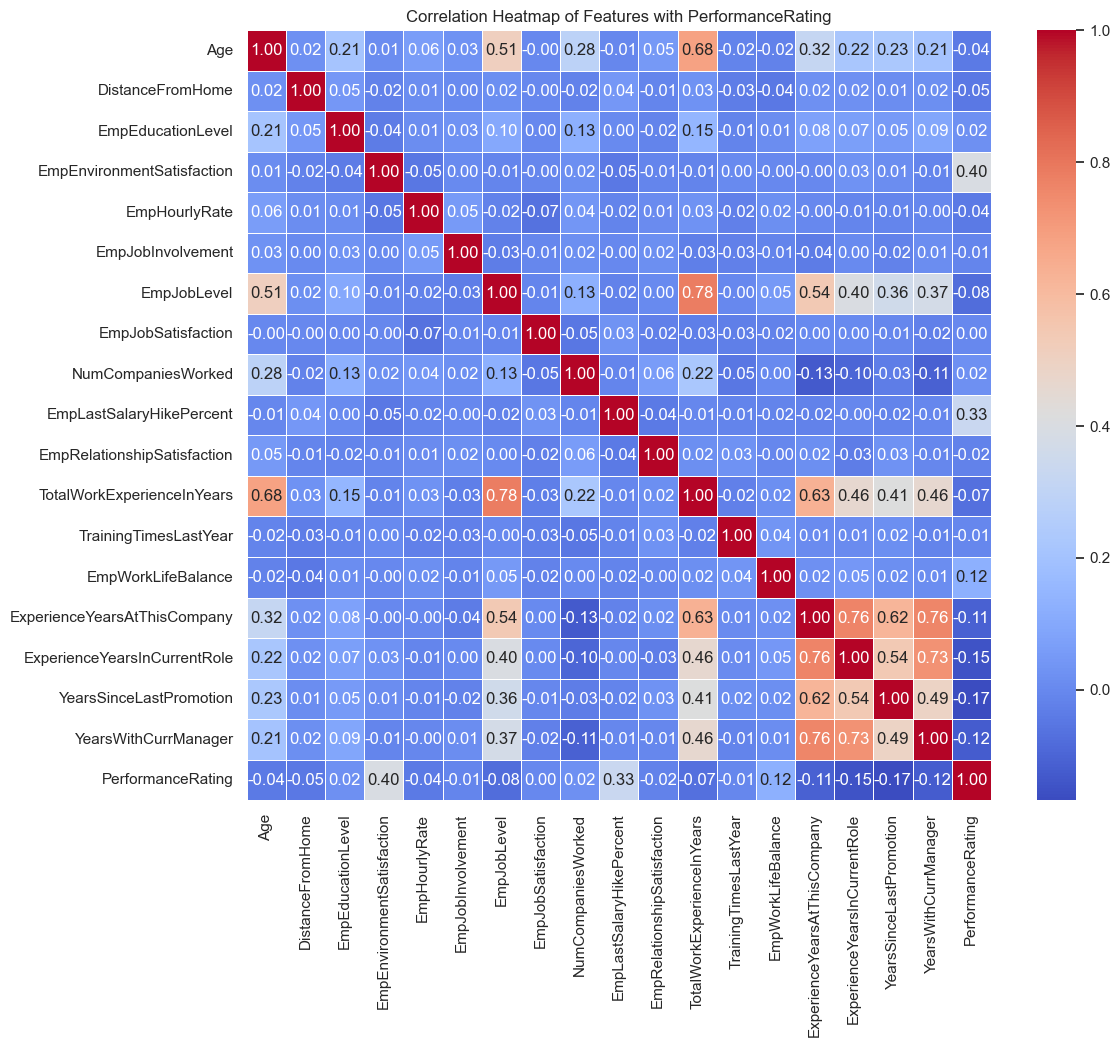

In [23]:
# Correlation matrix
correlation_matrix1 = epa.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with a color map (coolwarm) and annotation
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title
plt.title('Correlation Heatmap of Features with PerformanceRating')

# Show the plot
plt.show()

### <u>Insights:</u>
- Following are the linear relationship between the features and the target variable (PerformanceRating):
    - EmpEnvironmentSatisfaction (0.40): Employees with higher environment satisfaction tend to have higher performance ratings.
    - EmpLastSalaryHikePercent (0.33): A higher percentage increase in the last salary hike is associated with higher performance ratings.
    - EmpWorkLifeBalance (0.12): Better work-life balance is weakly positively correlated with performance ratings.
    - NumCompaniesWorked (0.02) and EmpEducationLevel (0.02): These features have a very weak positive correlation with performance 
    - YearsSinceLastPromotion (-0.17): A longer time since the last promotion is associated with lower performance ratings.
    - ExperienceYearsInCurrentRole (-0.15): More years in the current role are weakly negatively correlated with performance ratings.
    - YearsWithCurrManager (-0.12): More years with the current manager are weakly negatively correlated with performance ratings.
    - ExperienceYearsAtThisCompany (-0.11): More years at the current company are weakly negatively correlated with performance ratings.
    - EmpJobLevel (-0.08): Lower job levels are weakly negatively correlated with performance ratings.
    - Age (-0.04), EmpHourlyRate (-0.04), DistanceFromHome (-0.05), TotalWorkExperienceInYears (-0.07), EmpJobLevel (-0.08): These features have very weak negative correlations with performance ratings.
- Positive Correlation (Strong): EmpJobLevel has a strong positive correlation (0.51) with PerformanceRating.TotalWorkExperienceInYears and ExperienceYearsAtThisCompany also show a strong positive correlation (0.68 and 0.32, respectively). ExperienceYearsInCurrentRole and YearsWithCurrManager have moderate positive correlations (0.22 and 0.21, respectively).
- Negative Correlation (Moderate): EmpHourlyRate and DistanceFromHome have a moderate negative correlation with PerformanceRating (-0.04 and -0.05, respectively). EmpJobInvolvement and YearsSinceLastPromotion show moderate negative correlations (-0.01 and -0.02, respectively).
- Weak Correlation: EmpWorkLifeBalance has a weak positive correlation (0.12) with PerformanceRating. EmpEducationLevel and NumCompaniesWorked have weak positive correlations (0.21 and 0.02, respectively).
#### Considering the context of our analysis and business objectives, we are keeping the columns, because we need to analyse and convey insights to management, based on all the factors.

### 5.3 (b) <u>Numerical-Discrete Features</u>
### <u>Pairplot:</u>

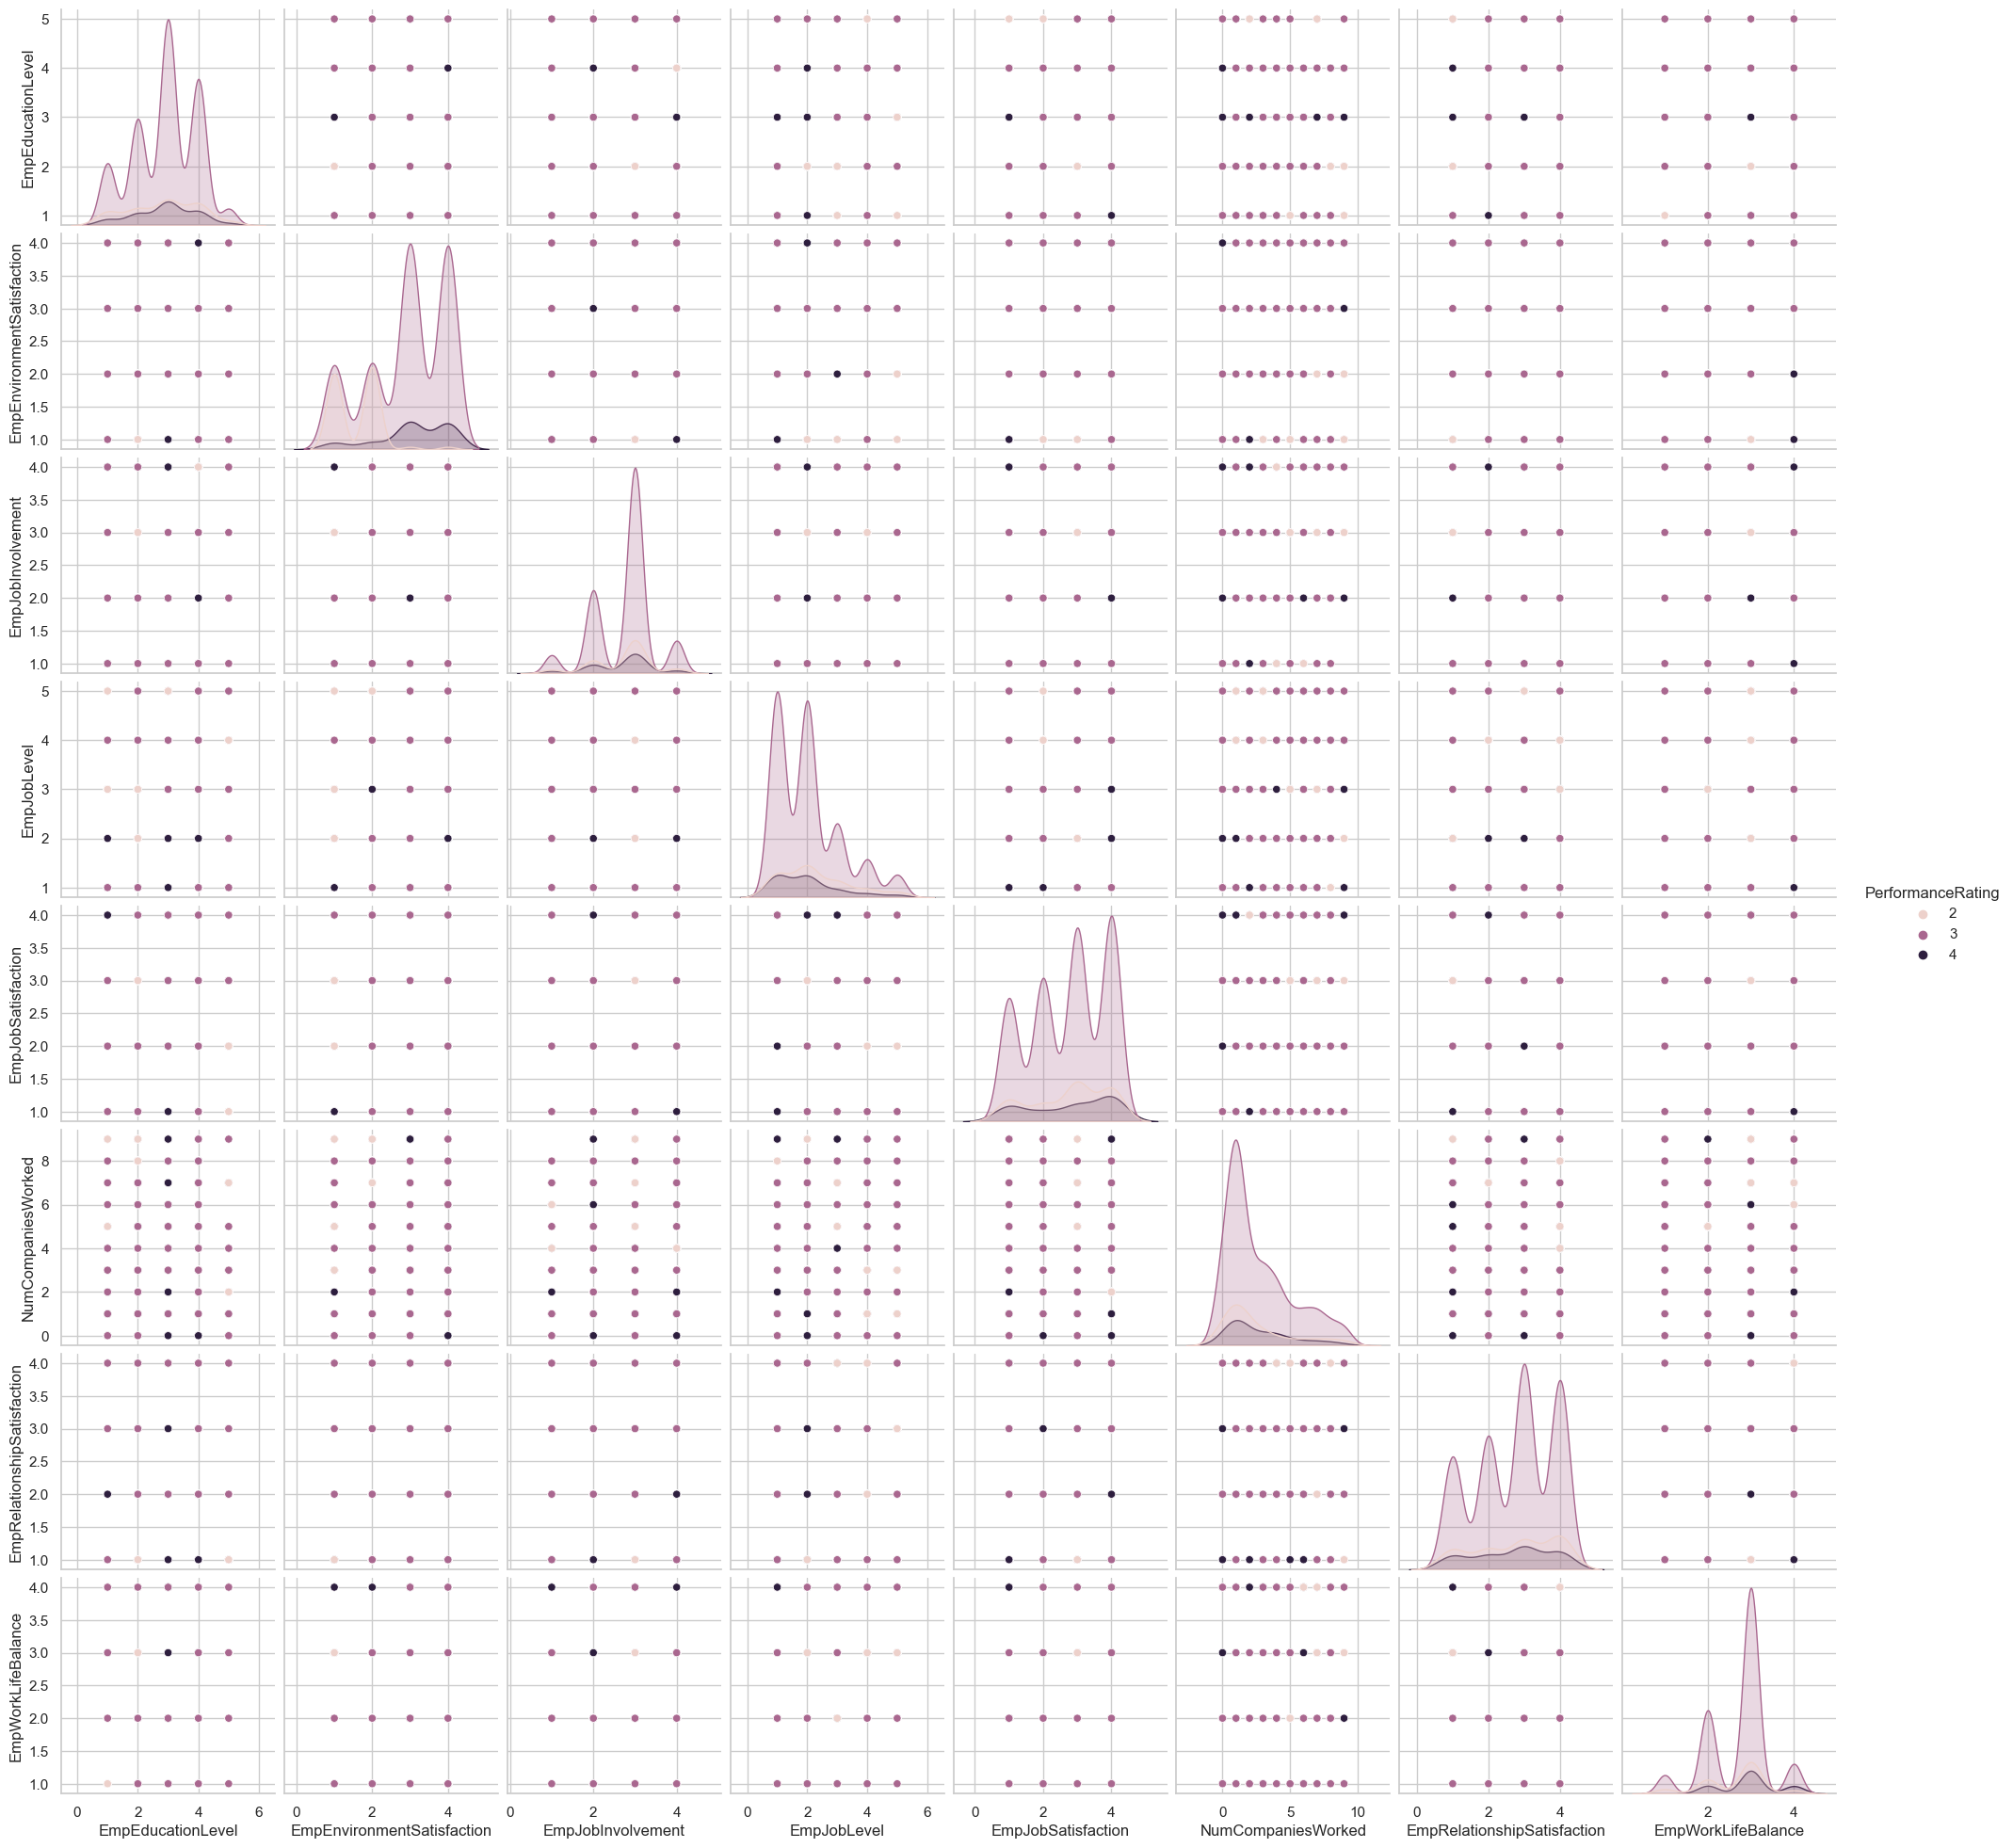

In [24]:
# Subset the dataframe with discrete columns
data_discrete = epa[data2]

# Create a pair plot
sns.pairplot(data_discrete, hue='PerformanceRating')
plt.show()

### 5.3 (c) <u>Categorical Variable</u>
### <u>Violin Plot</u>

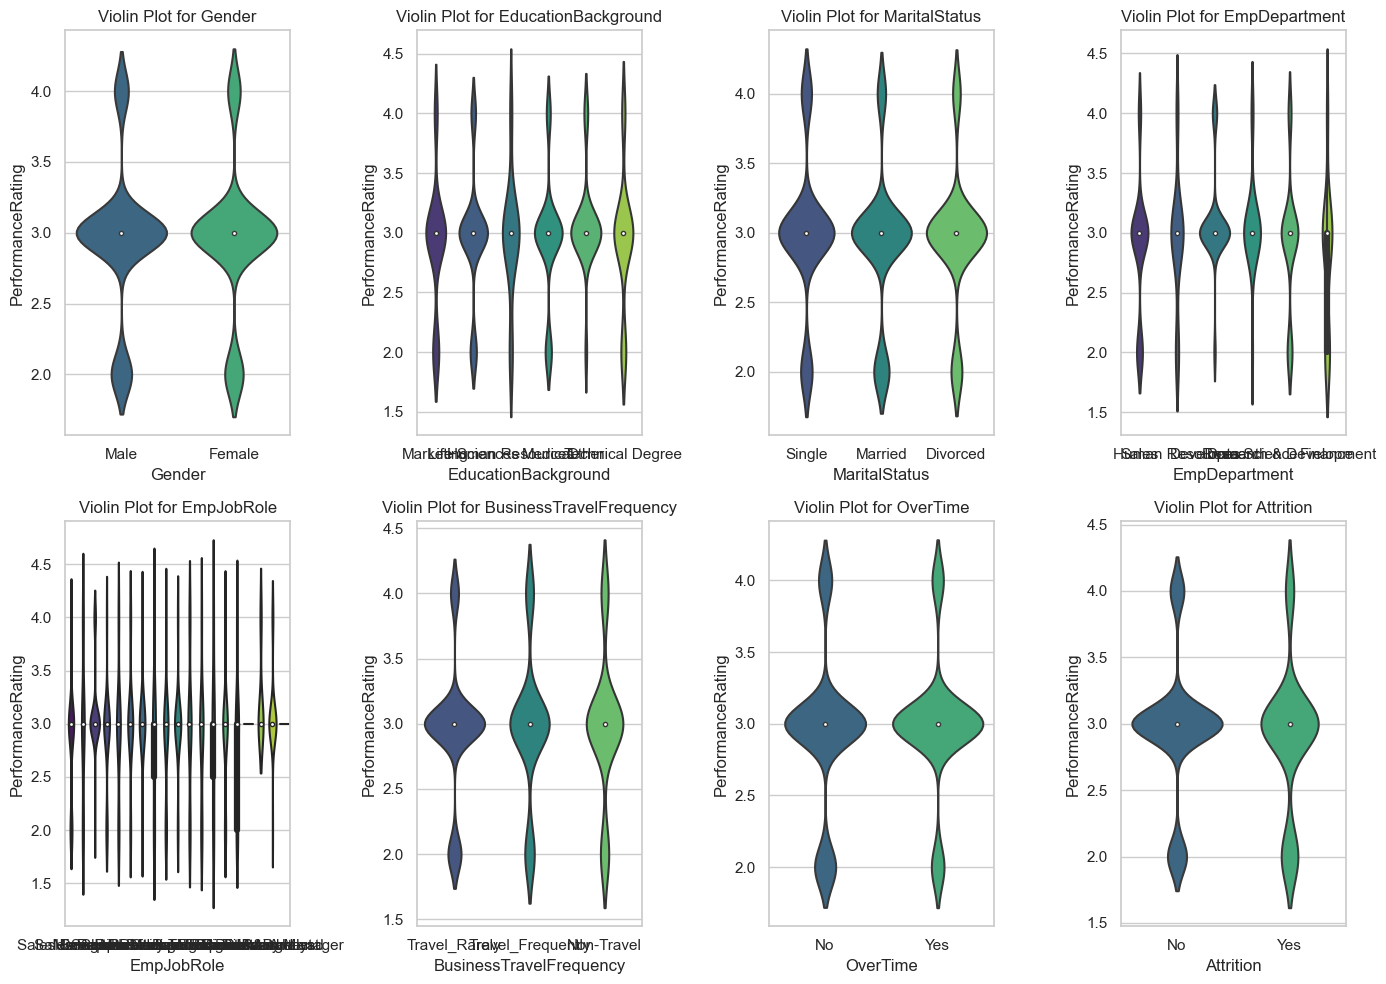

In [25]:
# Add 'PerformanceRating' to the list
data3_with_target = data3 + ['PerformanceRating']

# Subset the dataframe with categorical columns
data_categorical = epa[data3_with_target]

# Set style for better aesthetics
sns.set(style="whitegrid")

# Create violin plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(data3, 1):
    plt.subplot(2, 4, i)
    sns.violinplot(x=column, y='PerformanceRating', data=data_categorical, palette='viridis')
    plt.title(f'Violin Plot for {column}')

plt.tight_layout()
plt.show()

## 6. <u> Data Preprocessing

### 6.1 <u> Check for Missing Values
- Earlier we checked with isnull() method, lets check the unique values too.

In [21]:
for column in epa.columns:
    unique_values = epa[column].unique()
    print(f"Unique values for '{column}':\n{unique_values}\n")

Unique values for 'EmpNumber':
['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']

Unique values for 'Age':
[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]

Unique values for 'Gender':
['Male' 'Female']

Unique values for 'EducationBackground':
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']

Unique values for 'MaritalStatus':
['Single' 'Married' 'Divorced']

Unique values for 'EmpDepartment':
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']

Unique values for 'EmpJobRole':
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'T

### <u>Insights:
    - We can clearly see that there is no missing and corrupt values in any of the column.

### <u>6.2 Dropping the irrelevant column</u>
- EmpNumber, as it's a unique identifier, and dropping Attrition column because of the context of data that it could not impact on Performance Rating, if the employee has already left the company, then how could they are graded in performance rating.

In [20]:
epa.drop(['EmpNumber','Attrition'], axis=1, inplace = True)

## 7. <u> Train-Test Split</u>
- The recommended practice is to handle missing values first, then split the data into training and testing sets, and perform all the required transformations on each set separately to avoid data leakage.
- It's crucial to ensure consistency in encoding between the training and testing sets to avoid data leakage and obtain reliable model evaluation metrics.
- These steps are performed on the entire dataset, and they are essential for ensuring the data's quality and removing noise that might affect the model's performance.
- Tasks like encoding (e.g., one-hot encoding/ frequency encoding, label encoding) and scaling are typically applied after the train-test split, the primary reason for this is to avoid any data leakage from the test set into the training set. If we perform these transformations on the entire dataset before splitting, information from the test set might influence the transformation in a way that can lead to overfitting or optimistic performance estimates.


In [21]:
# Split the data into features (X) and target variable (y)

X = epa.drop('PerformanceRating',axis=1)
y = epa['PerformanceRating']

# We will use sklearn train-test-split and convert the base dataset to train and test dataset with 75% and 25% split.
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19)
#By default test_size value is 0.25, so no need to pass.

#Checking the shape of the created Train & Test DF's
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (900, 25)
 Shape of y_train is :  (900,)
 Shape of X_test is  :  (300, 25)
 Shape of y_test is  :  (300,)


## 8. <u>Outliers 

### 8.1 <u>Checking for Outliers

In [22]:
#  Calculate percentage of outliers in each numerical column
outlier_percentage_dict = {}

for column in data1:
    # Get the column values
    column_values = epa[column]

    # Calculate IQR
    Q1 = column_values.quantile(0.25)
    Q3 = column_values.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    num_outliers = ((column_values < lower_bound) | (column_values > upper_bound)).sum()

    # Calculate percentage of outliers
    percentage_outliers = (num_outliers / len(column_values)) * 100

    # Store the result in the dictionary
    outlier_percentage_dict[column] = percentage_outliers

# Display the results
for column, percentage in outlier_percentage_dict.items():
    print(f"Percentage of outliers in {column}: {percentage:.2f}%")

Percentage of outliers in Age: 0.00%
Percentage of outliers in DistanceFromHome: 0.00%
Percentage of outliers in EmpHourlyRate: 0.00%
Percentage of outliers in EmpLastSalaryHikePercent: 0.00%
Percentage of outliers in TotalWorkExperienceInYears: 4.25%
Percentage of outliers in TrainingTimesLastYear: 15.67%
Percentage of outliers in ExperienceYearsAtThisCompany: 4.67%
Percentage of outliers in ExperienceYearsInCurrentRole: 1.33%
Percentage of outliers in YearsSinceLastPromotion: 7.33%
Percentage of outliers in YearsWithCurrManager: 0.92%


In [23]:
# Define a threshold for the percentage of outliers
threshold_percentage = 5.0
# Separate columns with outliers less than or equal to 5% and more than 5%
outliers_below_threshold = {column: percentage for column, percentage in outlier_percentage_dict.items() if percentage <= threshold_percentage}
outliers_above_threshold = {column: percentage for column, percentage in outlier_percentage_dict.items() if percentage > threshold_percentage}

# Display the results
print(f"Columns with outliers less than or equal to {threshold_percentage}%:")
print(outliers_below_threshold)

print(f"\nColumns with outliers more than {threshold_percentage}%:")
print(outliers_above_threshold)

Columns with outliers less than or equal to 5.0%:
{'Age': 0.0, 'DistanceFromHome': 0.0, 'EmpHourlyRate': 0.0, 'EmpLastSalaryHikePercent': 0.0, 'TotalWorkExperienceInYears': 4.25, 'ExperienceYearsAtThisCompany': 4.666666666666667, 'ExperienceYearsInCurrentRole': 1.3333333333333335, 'YearsWithCurrManager': 0.9166666666666666}

Columns with outliers more than 5.0%:
{'TrainingTimesLastYear': 15.666666666666668, 'YearsSinceLastPromotion': 7.333333333333333}


### 8.2 <u>Handling Outliers:
#### We are handling outliers only for the columns those having less than 5% of total outliers.

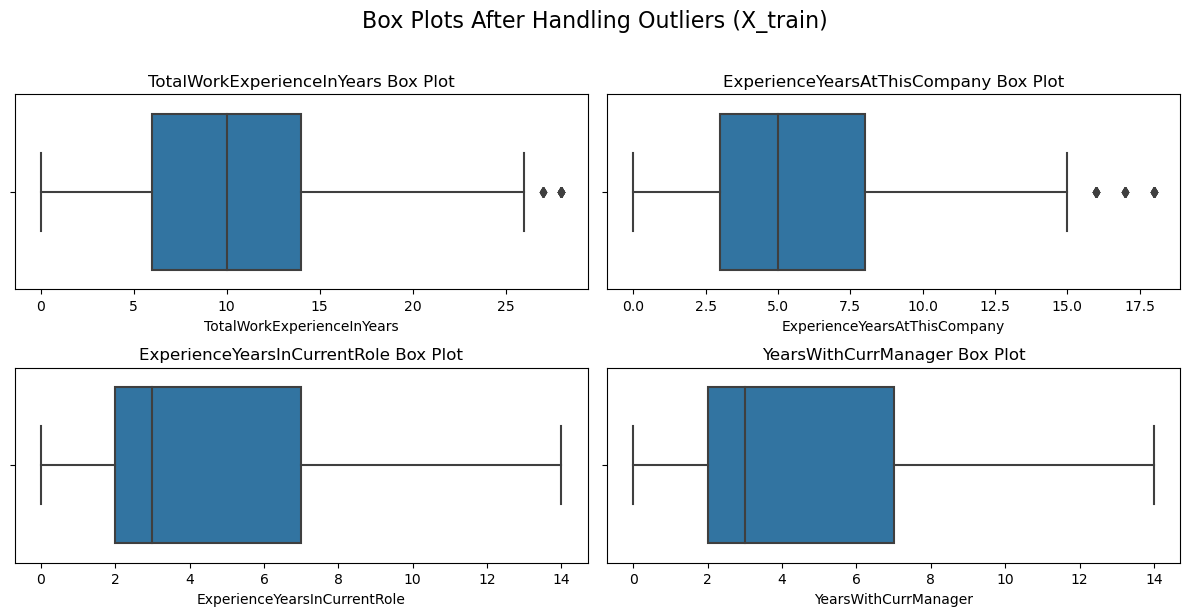

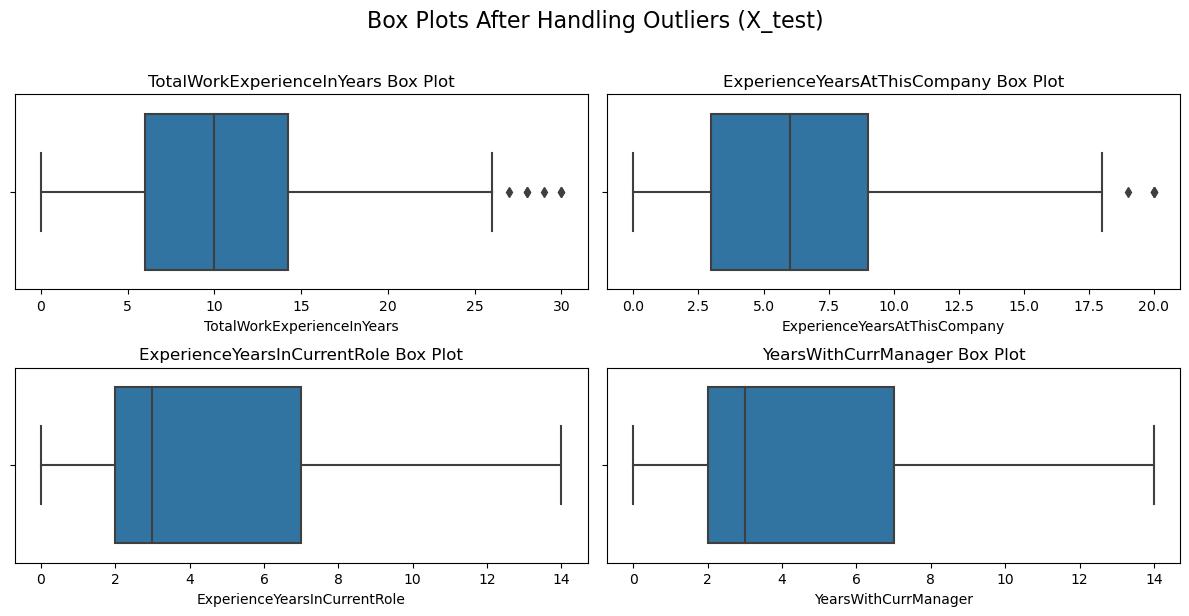

In [24]:
# As I have already split my data into X_train and X_test
# Specify the columns, want to handle outliers for
columns_with_outliers = ['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 
                         'YearsWithCurrManager']

# Define a threshold for the percentage of outliers
threshold_percentage = 5.0

# Columns with outliers less than or equal to 5%
outliers_below_threshold = {'TotalWorkExperienceInYears': 4.25, 'ExperienceYearsAtThisCompany': 4.666666666666667,
                             'ExperienceYearsInCurrentRole': 1.3333333333333335, 'YearsWithCurrManager': 0.9166666666666666}

# Handle outliers only in specified columns with less than or equal to 5% outliers for X_train
for column, percentage in outliers_below_threshold.items():
    # Calculate IQR for the specified column
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median of the column
    X_train[column] = np.where((X_train[column] < lower_bound) | (X_train[column] > upper_bound), X_train[column].median(), X_train[column])

# Handle outliers in the same way for X_test
for column, percentage in outliers_below_threshold.items():
    # Calculate IQR for the specified column
    Q1 = X_test[column].quantile(0.25)
    Q3 = X_test[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median of the column
    X_test[column] = np.where((X_test[column] < lower_bound) | (X_test[column] > upper_bound), X_test[column].median(), X_test[column])

# Visualize box plots after handling outliers for X_train
plt.figure(figsize=(12, 6))
plt.suptitle('Box Plots After Handling Outliers (X_train)', y=1.02, fontsize=16)

for i, column in enumerate(outliers_below_threshold.keys(), 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=X_train, x=column)
    plt.title(f'{column} Box Plot')

plt.tight_layout()
plt.show()

# Visualize box plots after handling outliers for X_test
plt.figure(figsize=(12, 6))
plt.suptitle('Box Plots After Handling Outliers (X_test)', y=1.02, fontsize=16)

for i, column in enumerate(outliers_below_threshold.keys(), 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=X_test, x=column)
    plt.title(f'{column} Box Plot')

plt.tight_layout()
plt.show()

## 9. <u>Encoding Categorical Variables</u>

In [25]:
print("Categorical Columns:", data3)

Categorical Columns: ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


### 9.1 <u>Label Encoding
    - Suitable for ordinal categorical variables where there is a meaningful order.
    - Assigns a unique integer to each category.
    - Appropriate for columns like 'EducationBackground', 'MaritalStatus', 'EmpDepartment', and 'EmpJobRole'.

In [26]:
label_encoder = LabelEncoder()

# Assuming these are the categorical columns to be label encoded
categorical_columns = ['EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole']

# Loop through each categorical column in both X_train and X_test
for column in categorical_columns:
    # Fit and transform on X_train
    X_train[column] = label_encoder.fit_transform(X_train[column])
    
    # Transform on X_test using the labels learned from X_train
    X_test[column] = label_encoder.transform(X_test[column])

### 8.2 <u>One-Hot Encoding
    - Suitable for nominal categorical variables.
    - Creates binary columns for each category.
    - Appropriate for columns like 'Gender', 'OverTime'.

In [27]:
# Assuming these are the categorical columns to be one-hot encoded
categorical_columns = ['Gender', 'OverTime']

# Use pd.get_dummies on both X_train and X_test
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

### 8.3 <u>Manual Encoding
    - As an alternative to one hot encoding, where I dont want to increase my dimensions, so using Manual Encoding.
    - It manually define the mapping of each category to a numerical value, and then use the map function to replace the categorical values with their corresponding numerical counterparts.

In [28]:
# Mapping dictionary
business_travel_mapping = {'Travel_Rarely': 2, 'Travel_Frequently': 1, 'Non-Travel': 0}

# Apply mapping to the 'BusinessTravelFrequency' column in the training set
X_train['BusinessTravelFrequency'] = X_train['BusinessTravelFrequency'].map(business_travel_mapping)
# Apply the same mapping to the 'BusinessTravelFrequency' column in the testing set
X_test['BusinessTravelFrequency'] = X_test['BusinessTravelFrequency'].map(business_travel_mapping)


In [29]:
# Assuming y_train and y_test are numpy arrays or Series
y_train = pd.DataFrame(y_train, columns=['PerformanceRating'])
y_test = pd.DataFrame(y_test, columns=['PerformanceRating'])

# Assuming 'PerformanceRating' is not numeric
PerformanceRating_mapping = {'2': 0, '3': 1, '4': 2}

# Apply mapping to the 'PerformanceRating' column in the training set
y_train['PerformanceRating'] = y_train['PerformanceRating'].astype(str).map(PerformanceRating_mapping)
y_test['PerformanceRating'] = y_test['PerformanceRating'].astype(str).map(PerformanceRating_mapping)

## 9. <u>Feature Scaling

In [37]:
for column in data1:
    print(f'Unique values for {column}: {epa[column].unique()}')

Unique values for Age: [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Unique values for DistanceFromHome: [10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18
 20 17 22 28 15]
Unique values for EmpHourlyRate: [ 55  42  48  73  84  32  54  67  63  81  49  99  57  96  44  86  83  61
  80  31  46  79  77  60  76  41  71  66  38  72  95  82  75  93  64  36
  69  33  35  40  43  51  52  98  45  37  94  59  88  50  65  53  56  78
  74  91  62  87  68  34  70 100  92  39  97  47  90  85  30  58  89]
Unique values for EmpLastSalaryHikePercent: [12 21 15 14 13 23 11 20 19 17 18 22 16 24 25]
Unique values for TotalWorkExperienceInYears: [10 20 23  9  4 28  1  7 12 30  5  2 19 16 34  6  8 11 17  3 14 26 13 22
  0 29 18 35 33 31 24 15 32 21 27 25 36 37 38 40]
Unique values for TrainingTimesLastYear: [2 1 4 5 6 3 0]
Unique values for ExperienceYearsAtThisCompany: [10  7 18 21  2  9  8  1  5 22  

### <u>Min-Max Scaling
    -  Min-Max scaling scales the data to a specific range, usually [0, 1], based on the minimum and maximum values in the dataset. Scaling is applied to all the continuous columns.

In [31]:
# Assuming data1 is a list of column names to be scaled
data1 = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train[data1] = scaler.fit_transform(X_train[data1])
X_test[data1] = scaler.transform(X_test[data1])

## 10. <u> Handling Imbalance Datasets
    -  Balancing the data is a good practice for multiclassification problems. In our case, we have three classes for the 'PerformanceRating' variable: 2, 3, and 4, with varying counts.
    - Balancing the data can help prevent the model from being biased towards the majority class, which may result in poor predictions for minority classes.
    - Techniques like SMOTE (Synthetic Minority Over-sampling Technique)is used to generate synthetic samples for the minority classes, which we are using in our case.

In [32]:
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert back to a DataFrame if needed
X_train_resampled = pd.DataFrame(data = X_train_resampled)
# Now, X_train_resampled contains the resampled data
# Convert y_train_resampled to a Pandas Series with the same name
y_train_resampled = pd.DataFrame(data = y_train_resampled)

print (" Shape of the X_train after resampling : ",X_train_resampled.shape)
print (" Shape of the Y_train after resampling : ",y_train_resampled.shape)


 Shape of the X_train after resampling :  (1950, 25)
 Shape of the Y_train after resampling :  (1950, 1)


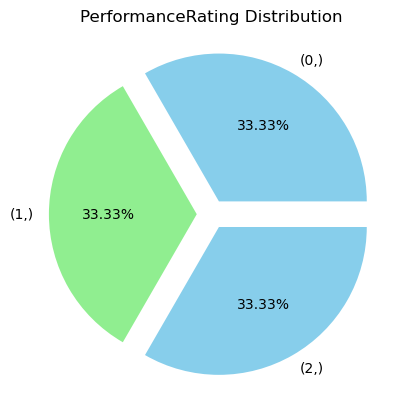

The shape of y_train_resampled is:  (1950, 1)


In [33]:
class_distribution = y_train_resampled.value_counts()
explode = [0.1] * len(class_distribution)  
colors = ['skyblue','lightgreen' ] 
class_distribution.plot.pie(autopct='%.2f%%', explode=explode, colors=colors)  # Plotting an exploded pie chart

plt.title('PerformanceRating Distribution')

plt.show()

print("The shape of y_train_resampled is: ", y_train_resampled.shape)

### <u>Insights:
- Good to begin with training the model, as all the three classes are equally balanced, and hence less possibility of any bias towards majority class.

In [16]:
# verifying all the transformations before feeding it to the algorithms.
print (y_train_resampled.head())
print (X_train_resampled.head())

   PerformanceRating
0                  1
1                  0
2                  1
3                  1
4                  1
        Age  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0  0.166667                    1              0              2           4   
1  0.761905                    3              1              2           4   
2  0.523810                    3              1              5          13   
3  0.404762                    4              1              4           7   
4  0.857143                    1              0              4          10   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        1          0.035714                  1   
1                        1          0.678571                  5   
2                        1          0.035714                  4   
3                        1          0.107143                  4   
4                        1          0.000000                  4   

  

## 11.<u>Building the Model</u>
### <u>Strategy:</u>
- Our dataset has imbalanced classes (i.e., one class is significantly more frequent than the others), hence accuracy might not be the best metric. In such cases, a model could achieve high accuracy by simply predicting the majority class. 
- As Mr. Brain expects a clear indicators of non performing employees, so that any penalization of non-performing employee, if required, may not significantly affect other employee morals, hence we need to focus on recall score.
#### The choice of metric should align with our business objectives. For instance, our goal is to identify underperforming employees, we should prioritize recall.
- and the models which we are building on our dataset or factors, which can impact employee performance are the following:
1. Logistic  Regression
2. KNN Classifier
3. SVM Classifier
4. RandomForest Classifier
5. Gradient Boosting Classifier
6. XGBOOST Classifier

    

## 11.1 <u>LogisticRegression:</u>
- We are using Multinomial Logistic Regression (Softmax Regression), which is the generalization of binary logistic regression to handle multiple classes directly.
- It uses the softmax function to compute probabilities for each class and assigns the class with the highest probability as the predicted class.

In [34]:
# Create a logistic regression model with multinomial (softmax) option
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=19)

# Train the model
logreg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(multi_class='multinomial', random_state=19)

### 11.1(a) Evaluation Metrics: 
### <u>Classification Report/ Confusion Matrix/ AUC-ROC Score</u>

 Shape of y_pred is : (300,)

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.68      0.61        50
           1       0.89      0.76      0.82       224
           2       0.38      0.69      0.49        26

    accuracy                           0.74       300
   macro avg       0.61      0.71      0.64       300
weighted avg       0.79      0.74      0.76       300

Training Accuracy: 0.84
Testing Accuracy: 0.74

 Confusion Matrix:


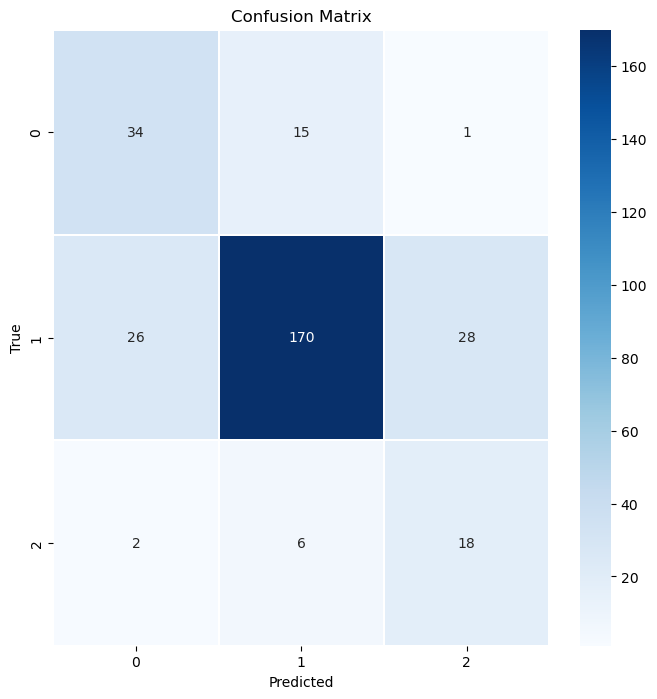

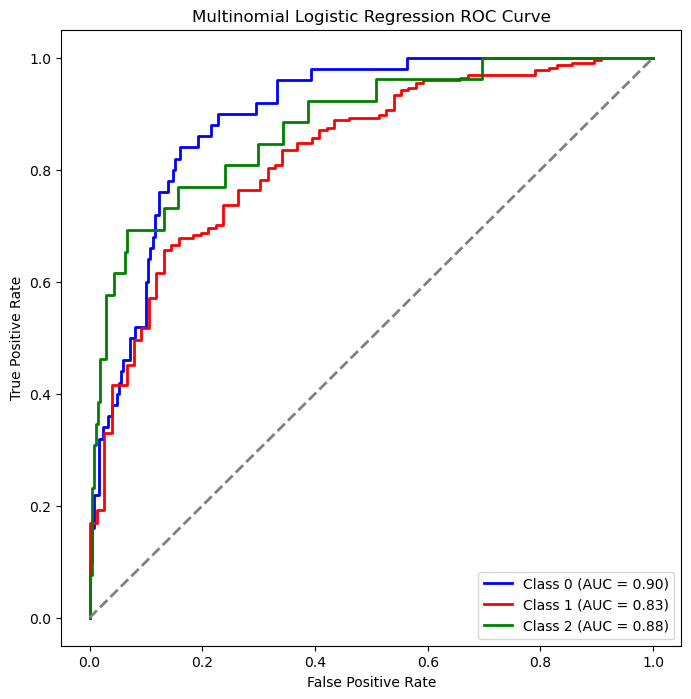

In [35]:
# Make predictions using the logistic regression model
y_pred = logreg_model.predict(X_test)
print(f' Shape of y_pred is : {y_pred.shape}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Check the training accuracy
training_accuracy = logreg_model.score(X_train_resampled, y_train_resampled)
print(f'Training Accuracy: {training_accuracy:.2f}')
# Check the testing accuracy
testing_accuracy = logreg_model.score(X_test, y_test)
print(f'Testing Accuracy: {testing_accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix:')

#Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.3, cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities on the test set for each class
y_prob = logreg_model.predict_proba(X_test)

# Compute ROC curve and ROC-AUC score for each class
n_classes = len(logreg_model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
colors = ['blue', 'red', 'green']  
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multinomial Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()


### <u>Insights:
    - Training accuracy is 84%, and the testing accuracy is 74%. This indicates a potential performance gap, there may be room for improvement, especially in terms of precision and recall for certain classes.
    - 34, 26, 28, 2, 18, these instances are the misclassifications made by the model.
    - ROC values give insights into how well the model discriminates each class, with higher values indicating better performance. 0.90, 0.83 and 0.88 indicates model performs well in correctly classifying instances in different classes.

### 11.1(b) <u>Evaluation by Cross Validation
    - Stratified k-fold cross-validation is particularly useful when dealing with imbalanced datasets, as its in our case.

In [36]:
# Assuming model is your logistic regression model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

# Use recall as the scoring metric for multiclass (average='weighted' for multiclass)
scorer = make_scorer(recall_score, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(logreg_model, X_train_resampled, y_train_resampled, cv=cv, scoring=scorer)

# Display the results
print("Cross-validated scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))
print("Standard deviation of CV scores:", np.std(cross_val_scores))

Cross-validated scores: [0.79487179 0.82820513 0.85384615 0.85641026 0.83846154]
Mean CV score: 0.8343589743589744
Standard deviation of CV scores: 0.022270821282675348


### <u>Insights:
    - The average accuracy across all folds (stratified k-fold cross-validation) is approximately 83.48%.
    - The standard deviation of 0.0213 indicates a relatively low variability in the accuracy scores among different folds, it seems that the model's performance is consistent across all the folds.

### 11.1(c) <u>Hyperparameter Tuning

In [27]:
# Define the hyperparameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg_model, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
accuracy = grid_search.score(X_test, y_test)
print("Accuracy on the test set: {:.2f}".format(accuracy))

Best hyperparameters:  {'C': 10}
Accuracy on the test set: 0.73


### <u>Insights:
    - As after hyperparameter tuning, results will not improve, that's what we can see from above results.
    - So, we are not going to again instantiate the model, it will be a waste of time, and computing resources.
    - Lets explore with different models.

## 11.2. <u>KNN Classifier</u>

In [37]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # We can adjust the number of neighbors

# Train the model
knn_classifier.fit(X_train_resampled, y_train_resampled)



KNeighborsClassifier()

### 11.2(a) Evaluation Metrics: 
### <u>Classification Report/ Confusion Matrix/ AUC-ROC Score</u>


Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.54      0.45        50
           1       0.84      0.56      0.67       224
           2       0.14      0.42      0.21        26

    accuracy                           0.55       300
   macro avg       0.45      0.51      0.44       300
weighted avg       0.70      0.55      0.60       300

Training Accuracy: 0.88
Testing Accuracy: 0.55


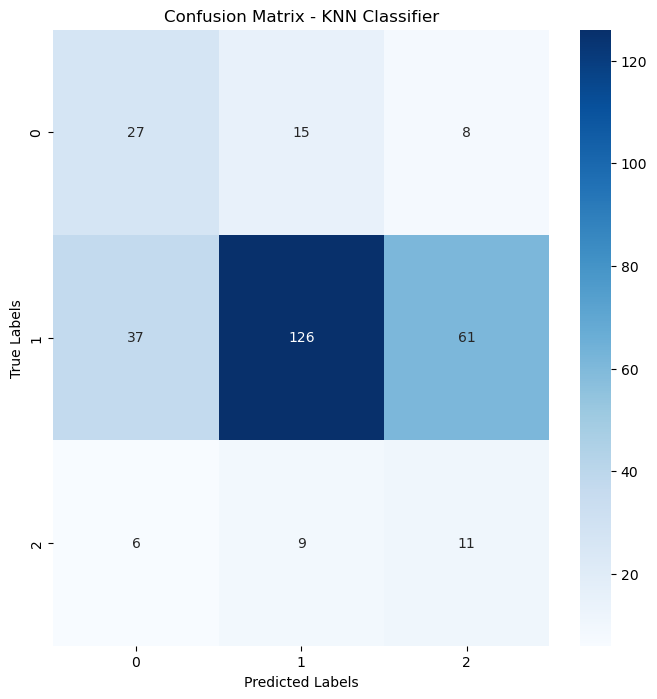

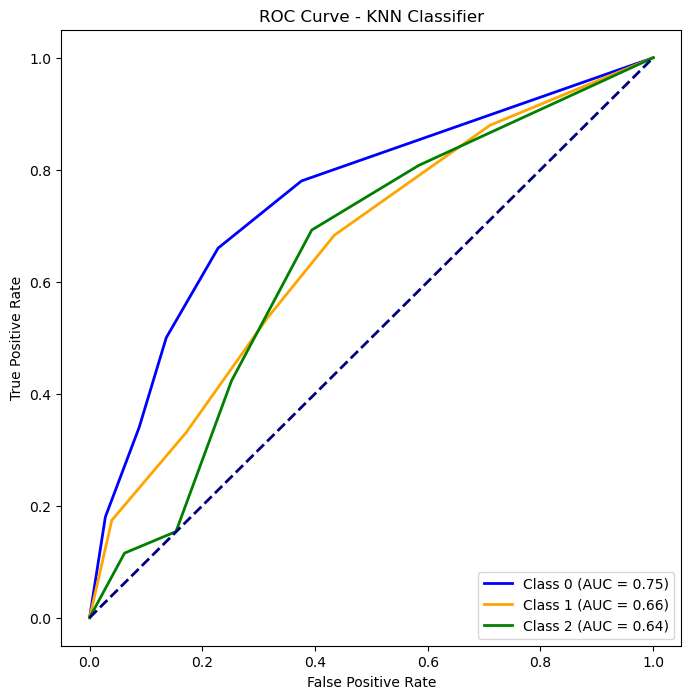

In [38]:
# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

print('\nClassification Report:')
print(classification_report(y_test, y_pred_knn))

# Check the training accuracy
training_accuracy = knn_classifier.score(X_train_resampled, y_train_resampled)
print(f'Training Accuracy: {training_accuracy:.2f}')
# Check the testing accuracy
testing_accuracy = knn_classifier.score(X_test, y_test)
print(f'Testing Accuracy: {testing_accuracy:.2f}')

# Create a confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

# Make predictions on the test data
y_pred_proba = knn_classifier.predict_proba(X_test)

# Binarize the labels for multi-class ROC-AUC
y_test_bin = label_binarize(y_test, classes=list(range(3)))  # we have 3 classes

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming we have 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))
colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend(loc='lower right')
plt.show()

### <u>Insights:</u>
- Training accuracy is 88% and testing is 55%, its clearly indicates overfitting.
- The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions. Class 0: 27 true positives, 15 false positives, and 8 false negatives. Class 1: 126 true positives, 37 false positives, and 61 false negatives. Class 2: 11 true positives, 9 false positives, and 6 false negatives.
- The ROC scores indicate the model's ability to discriminate between classes are not that well.
- The model not performs well on certain aspects but require improvements, especially for better identification of class 2.

### 11.2(b) <u>Cross Validation</u>

In [39]:
# Assuming model is your logistic regression model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

# Use recall as the scoring metric for multiclass (average='weighted' for multiclass)
scorer = make_scorer(recall_score, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(knn_classifier, X_train_resampled, y_train_resampled, cv=cv, scoring=scorer)

# Display the results
print("Cross-validated scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))
print("Standard deviation of CV scores:", np.std(cross_val_scores))

Cross-validated scores: [0.80769231 0.82051282 0.7974359  0.81538462 0.82051282]
Mean CV score: 0.8123076923076923
Standard deviation of CV scores: 0.008793040102298557


### <u>Insights:
    - The KNN classifier demonstrates good and consistent performance in terms of recall across different folds. The mean recall score of approximately 0.8123 suggests that, on average, the model is effective in correctly identifying positive instances. The low standard deviation indicates stability in the model's performance across various subsets of the data during cross-validation.

### 11.2(c)<u> Hyperparameter tuning

In [51]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']
}

# Define the scorer (weighted average of recall in this example)
scorer = make_scorer(recall_score, average='weighted')

# Create the grid search
grid_search = GridSearchCV(knn_classifier, param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Evaluate the performance of the classifier
recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f'Weighted Recall on the test set with the best model: {recall_weighted:.2f}')

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Weighted Recall on the test set with the best model: 0.53


Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.50      0.45        50
           1       0.81      0.62      0.70       224
           2       0.12      0.31      0.17        26

    accuracy                           0.57       300
   macro avg       0.45      0.48      0.44       300
weighted avg       0.69      0.57      0.62       300

Training Accuracy: 1.00
Testing Accuracy: 0.57


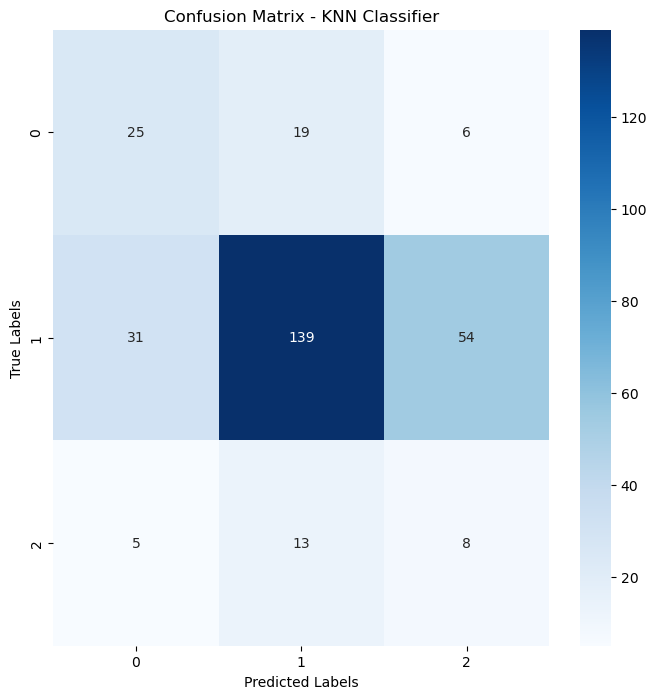

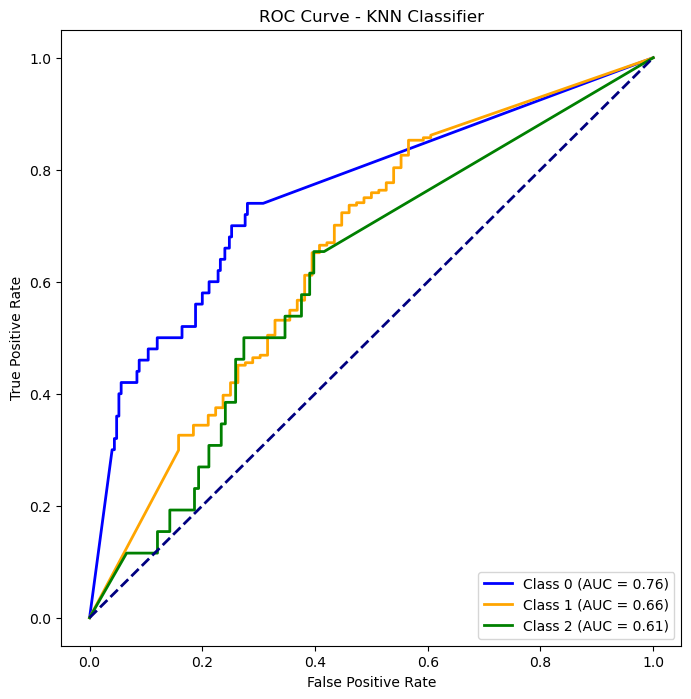

In [40]:
# Set the best hyperparameters
best_params = {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

# Initialize the KNN classifier with the best parameters
bst_knn_classifier = KNeighborsClassifier(**best_params)

# Train the model on the training data
bst_knn_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_bst = bst_knn_classifier.predict(X_test)

# Evaluate the performance of the model
print("Classification Report:")
print(classification_report(y_test, y_pred_bst))

# Check the training accuracy
training_accuracy = bst_knn_classifier.score(X_train_resampled, y_train_resampled)
print(f'Training Accuracy: {training_accuracy:.2f}')
# Check the testing accuracy
testing_accuracy = bst_knn_classifier.score(X_test, y_test)
print(f'Testing Accuracy: {testing_accuracy:.2f}')

# Create a confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_bst)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

# Make predictions on the test data
y_pred_proba = bst_knn_classifier.predict_proba(X_test)

# Binarize the labels for multi-class ROC-AUC
y_test_bin = label_binarize(y_test, classes=list(range(3)))  # we have 3 classes

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming we have 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))
colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend(loc='lower right')
plt.show()

### <u>CV after hyperparameter tuning</u>

In [41]:
# Assuming model is your logistic regression model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

# Use recall as the scoring metric for multiclass (average='weighted' for multiclass)
scorer = make_scorer(recall_score, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(bst_knn_classifier, X_train_resampled, y_train_resampled, cv=cv, scoring=scorer)

# Display the results
print("Cross-validated scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))
print("Standard deviation of CV scores:", np.std(cross_val_scores))

Cross-validated scores: [0.84871795 0.85128205 0.83589744 0.85897436 0.86153846]
Mean CV score: 0.8512820512820513
Standard deviation of CV scores: 0.00902913685213282


### <u>Insights:
    - So, distance based algorithm do not show any further improvement, so let's switch to other models.

## 11.3 <u>SVC(Support Vector Classifier)

In [42]:
from sklearn.svm import SVC

# Create an SVC classifier with default parameters
svc_classifier = SVC(probability=True,random_state=19)

# Train the model
svc_classifier.fit(X_train_resampled, y_train_resampled)



SVC(probability=True, random_state=19)

### 11.3(a) <u>Evaluation Metrics</u>
### <u>Classification Report/ Confusion Matrix/ AUC-ROC Score</u>   


Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.66      0.57        50
           1       0.89      0.77      0.82       224
           2       0.37      0.58      0.45        26

    accuracy                           0.73       300
   macro avg       0.59      0.67      0.61       300
weighted avg       0.78      0.73      0.75       300

Training Accuracy: 0.86
Testing Accuracy: 0.73


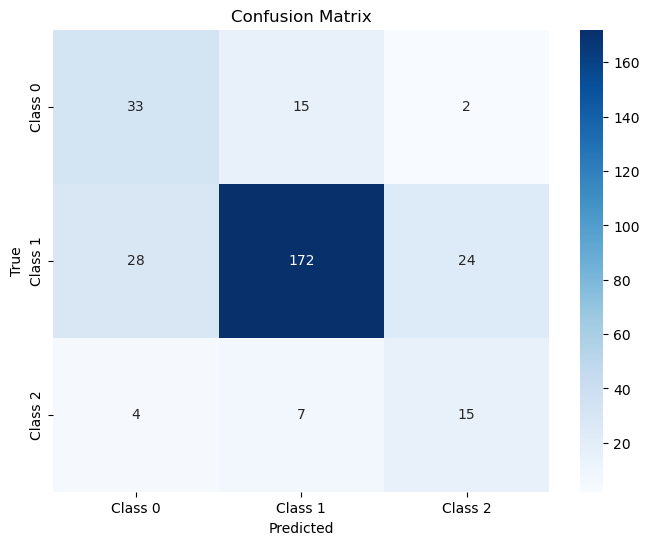

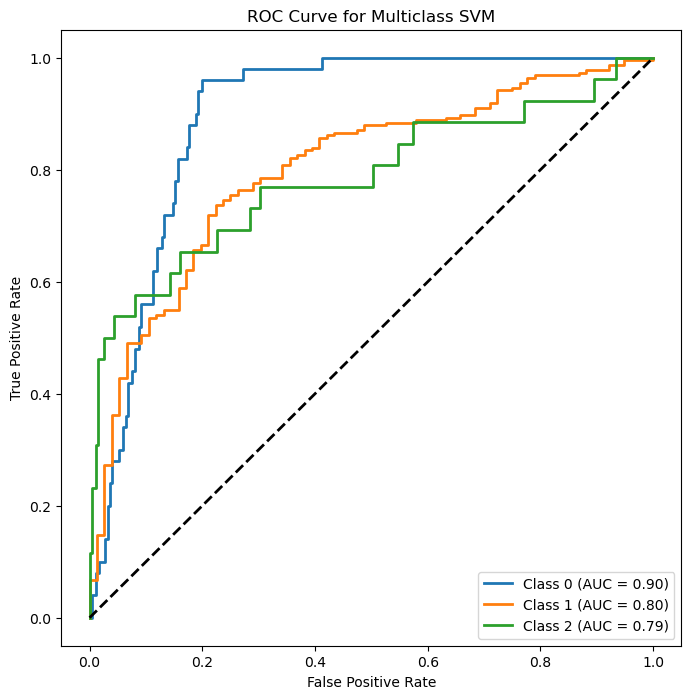

Macro-average ROC AUC: 0.83


In [43]:
# Make predictions on the test set
y_pred_svc = svc_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred_svc)
classification_rep = classification_report(y_test, y_pred_svc)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

#  Check the training accuracy
training_accuracy = svc_classifier.score(X_train_resampled, y_train_resampled)
print(f'Training Accuracy: {training_accuracy:.2f}')
# Check the testing accuracy
testing_accuracy = svc_classifier.score(X_test, y_test)
print(f'Testing Accuracy: {testing_accuracy:.2f}')

# Replace class_labels with your actual class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Generate the confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Assuming n_classes is the number of classes in your problem
n_classes = len(np.unique(y_train_resampled))

# Convert the target variable to binary format
y_train_bin = label_binarize(y_train, classes=np.unique(y_train_resampled))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train_resampled))

# Get the predicted probabilities for each class on the test set
y_pred_proba = svc_classifier.decision_function(X_test)

# Calculate ROC AUC for each class
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average='macro')

# Initialize the plot
plt.figure(figsize=(8, 8))

# Initialize the list to store the fpr and tpr for each class
fpr = dict()
tpr = dict()

# Plot the ROC curves for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc_i = auc(fpr[i], tpr[i])
    
    # Plot the ROC curve for each class
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc_i:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass SVM')
plt.legend(loc='lower right')

# Show the plot
plt.show()
print(f'Macro-average ROC AUC: {roc_auc:.2f}')

### <u>Insights:
    - The overall accuracy of the SVC model on the test set is 73%, indicating that the model correctly predicted the class labels for 73% of the instances, Recall for class 0: 66% (0.66), Recall for class 1: 77% (0.77), Recall for class 2: 58% (0.58).
    - For class 0, there are 33 true positives, 15 false positives, and 2 false negatives.
    - the model shows reasonable performance, with higher precision and recall for class 1, and lower performance for class 2. The ROC scores also suggest good discrimination between classes, especially for class 0. Model is performing well, but overfitting still exists and thus there is a room for improvement.

### 11.3 (b) <u>Performance evaluation by CV in terms of recall score</u>

In [44]:
# Model is SVC
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

# Use recall as the scoring metric for multiclass (average='weighted' for multiclass)
scorer = make_scorer(recall_score, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(svc_classifier, X_train_resampled, y_train_resampled, cv=cv, scoring=scorer)

# Display the results
print("Cross-validated scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))
print("Standard deviation of CV scores:", np.std(cross_val_scores))

Cross-validated scores: [0.83076923 0.84615385 0.82820513 0.84358974 0.82051282]
Mean CV score: 0.8338461538461539
Standard deviation of CV scores: 0.009648660370372703


### <u>Insights:
    - SVC model seems to be performing well, with an average weighted of around 83.38%, and the consistency across folds is reasonably good, as indicated by the relatively low standard deviation.

### 11.3(c) <u>Hyperparameter tuning</u>

In [62]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
}

# Create GridSearchCV with scoring based on recall
grid_search = GridSearchCV(svc_classifier, param_grid, cv=5, scoring='recall_weighted', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params_recall = grid_search.best_params_

Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.76      0.57        50
           1       0.90      0.66      0.76       224
           2       0.25      0.50      0.33        26

    accuracy                           0.66       300
   macro avg       0.53      0.64      0.56       300
weighted avg       0.77      0.66      0.69       300

Training Accuracy: 0.74
Testing Accuracy: 0.66


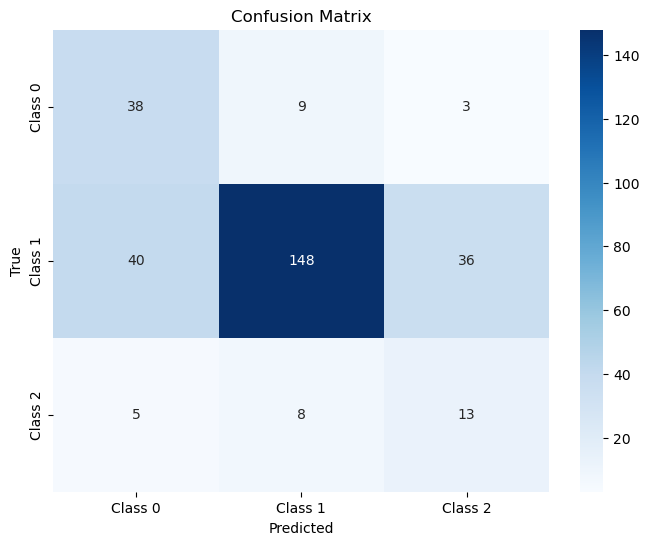

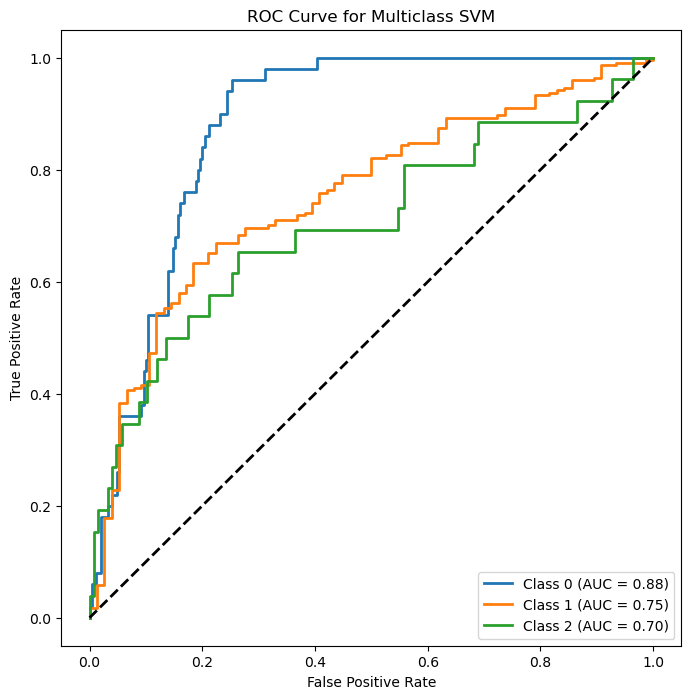

Macro-average ROC AUC: 0.78


In [45]:
best_params_svc= {'C': 10, 'kernel': 'rbf', 'gamma': 0.0001}

# Create an SVC classifier with default parameters
svc_classifier_tun = SVC(**best_params_svc, probability=True,random_state=19)

# Train the model
svc_classifier_tun.fit(X_train_resampled, y_train_resampled)


# Make predictions on the test set
y_pred_svc_tun = svc_classifier_tun.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred_svc_tun)
classification_rep = classification_report(y_test, y_pred_svc_tun)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

#  Check the training accuracy
training_accuracy = svc_classifier_tun.score(X_train_resampled, y_train_resampled)
print(f'Training Accuracy: {training_accuracy:.2f}')
# Check the testing accuracy
testing_accuracy = svc_classifier_tun.score(X_test, y_test)
print(f'Testing Accuracy: {testing_accuracy:.2f}')

# Replace class_labels with your actual class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Generate the confusion matrix
cm_svc_tun = confusion_matrix(y_test, y_pred_svc_tun)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc_tun, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Assuming n_classes is the number of classes in your problem
n_classes = len(np.unique(y_train_resampled))

# Convert the target variable to binary format
y_train_bin = label_binarize(y_train_resampled, classes=np.unique(y_train_resampled))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train_resampled))

# Get the predicted probabilities for each class on the test set
y_pred_proba = svc_classifier_tun.decision_function(X_test)

# Calculate ROC AUC for each class
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average='macro')

# Initialize the plot
plt.figure(figsize=(8, 8))

# Initialize the list to store the fpr and tpr for each class
fpr = dict()
tpr = dict()

# Plot the ROC curves for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc_i = auc(fpr[i], tpr[i])
    
    # Plot the ROC curve for each class
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc_i:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass SVM')
plt.legend(loc='lower right')

# Show the plot
plt.show()
print(f'Macro-average ROC AUC: {roc_auc:.2f}')


### <u>Insights:
    - After fine tuning the model, it gives us a more generalized model, but still we need a better model, so lets explore.

### 11.3(d) <u>CV after hyperparameter tuning</u>

In [46]:
# Model is SVC
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

# Use recall as the scoring metric for multiclass (average='weighted' for multiclass)
scorer = make_scorer(recall_score, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(svc_classifier_tun, X_train_resampled, y_train_resampled, cv=cv, scoring=scorer)

# Display the results
print("Cross-validated scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))
print("Standard deviation of CV scores:", np.std(cross_val_scores))

Cross-validated scores: [0.71794872 0.75128205 0.70769231 0.73333333 0.69487179]
Mean CV score: 0.7210256410256412
Standard deviation of CV scores: 0.019688568020976883


### <u>Insights:
    - Performing equally well, with more generalisation, and across every folds, results are stable, but for better score and thus perormance, build some tree structure based models.

## 11.4 <u>Random Forest Classifier

In [47]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=19)

# Train the classifier on the training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=19)

### 11.4 (a) <u>Evaluation Metrics</u>
### <u>Classification Report/ Confusion Matrix/ AUC-ROC Score</u>

Accuracy: 0.9033333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        50
           1       0.94      0.93      0.94       224
           2       0.62      0.77      0.69        26

    accuracy                           0.90       300
   macro avg       0.83      0.85      0.84       300
weighted avg       0.91      0.90      0.91       300

Training Accuracy: 1.00
Testing Accuracy: 0.90


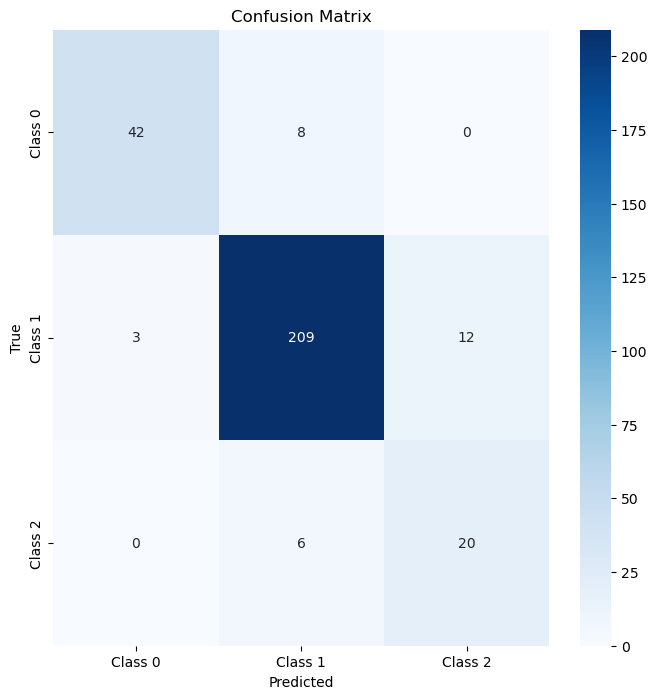

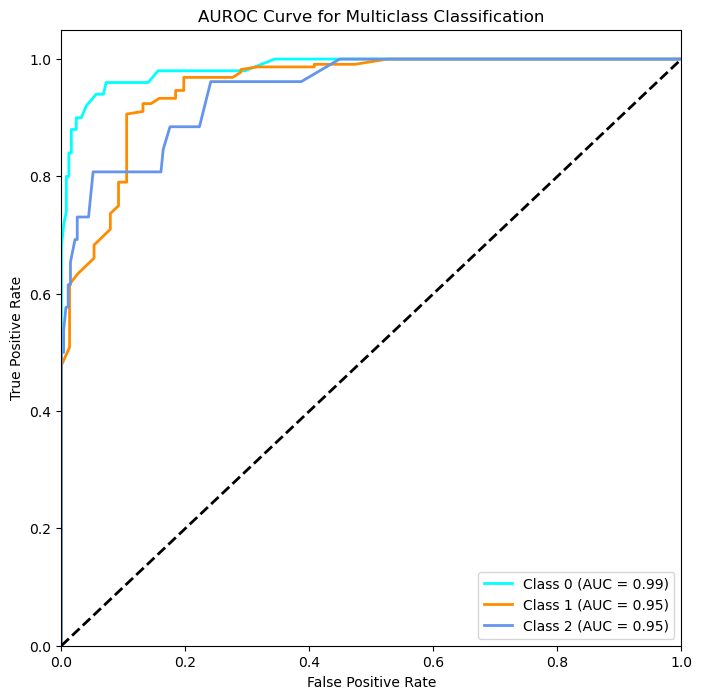

In [48]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

#  Check the training accuracy
training_accuracy = rf_classifier.score(X_train_resampled, y_train_resampled)
print(f'Training Accuracy: {training_accuracy:.2f}')
# Check the testing accuracy
testing_accuracy = rf_classifier.score(X_test, y_test)
print(f'Testing Accuracy: {testing_accuracy:.2f}')

# Replace class_labels with your actual class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
n_classes= len(rf_classifier.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_classifier.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

### <u>Insights:</u>
- The model performed very well on the training set (100% accuracy), but there might be a concern about overfitting.
- On the test set, the model achieved an accuracy of 90.33%, indicating good generalization.
- Precision and recall metrics provide insights into the model's performance for each class.
- Regarding confusion matrix: Class 0: 42 instances correctly predicted, 8 instances misclassified, Class 1: 209 instances correctly predicted, 3 instances misclassified as Class 0, and 12 instances misclassified as Class 2, Class 2: 20 instances correctly predicted, 6 instances misclassified as Class 1.
- The AUC scores suggest good discriminatory power for each class.
    

### 11.4(b) <u>Model Performance evaluation by CV:</u>

In [49]:
# Assuming model is your random forest model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

# Use recall as the scoring metric for multiclass (average='weighted' for multiclass)
scorer = make_scorer(recall_score, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring=scorer)

# Display the results
print("Cross-validated scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))
print("Standard deviation of CV scores:", np.std(cross_val_scores))

Cross-validated scores: [0.91666667 0.93333333 0.92222222 0.93888889 0.92777778]
Mean CV score: 0.9277777777777778
Standard deviation of CV scores: 0.007856742013183865


### <u>Insights:</u>
- The Random Forest model shows robust performance with high accuracy and low variability across different cross-validation folds, but considering the overfitting impact, lets fine tune the model for generalized approach.
    

### 11.4(c) <u>Hyperparameter tuning</u>

In [71]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=19)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring=scorer, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters on the entire training set
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluate the performance on the test set
y_pred_test = best_rf_classifier.predict(X_test)
test_recall = recall_score(y_test, y_pred_test, average='weighted')
print("Recall on the test set:", test_recall)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Recall on the test set: 0.8966666666666666


Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        50
           1       0.94      0.93      0.94       224
           2       0.61      0.77      0.68        26

    accuracy                           0.90       300
   macro avg       0.83      0.84      0.83       300
weighted avg       0.91      0.90      0.90       300

Training Accuracy: 1.00
Testing Accuracy: 0.90


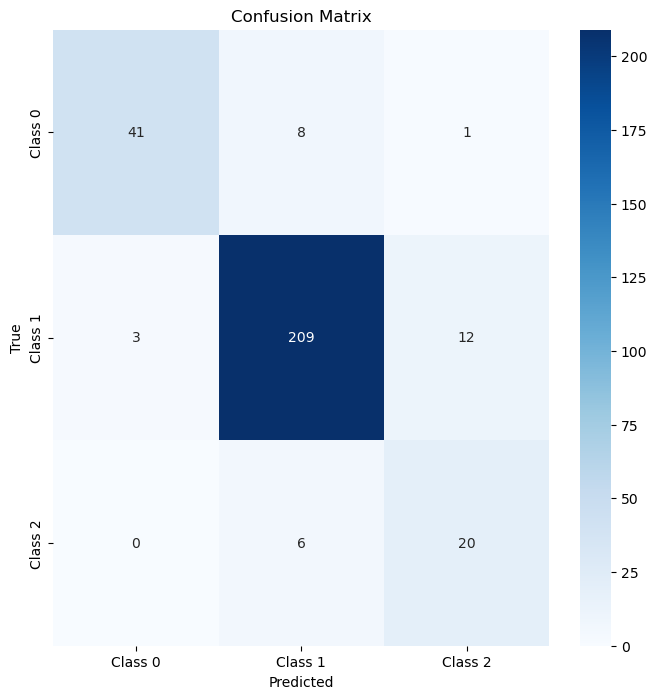

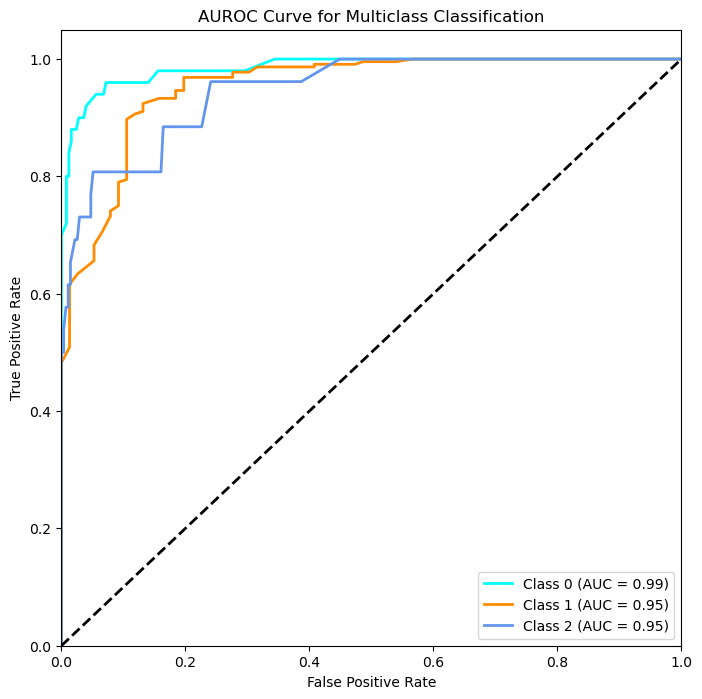

In [50]:
# Assuming rf_classifier is your RandomForestClassifier instance
best_hyperparameters = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

# Create a new instance of the RandomForestClassifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_hyperparameters, random_state=19)

# Train the model on the entire training set
best_rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_tun = best_rf_classifier.predict(X_test)


# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_tun)
classification_rep = classification_report(y_test, y_pred_tun)

# Print the results
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

#  Check the training accuracy
training_accuracy = best_rf_classifier.score(X_train_resampled, y_train_resampled)
print(f'Training Accuracy: {training_accuracy:.2f}')
# Check the testing accuracy
testing_accuracy = best_rf_classifier.score(X_test, y_test)
print(f'Testing Accuracy: {testing_accuracy:.2f}')

# Replace class_labels with your actual class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tun)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
n_classes= len(best_rf_classifier.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], best_rf_classifier.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

### <u>Insights:</u>
- After fine tuning also, it gives the same result without any improvement in terms of generalized model, lett's explore more.

### 11.4 (d) <u>CV Score after hyperparameter tuning</u>

In [51]:
# Assuming model is your random forest model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

# Use recall as the scoring metric for multiclass (average='weighted' for multiclass)
scorer = make_scorer(recall_score, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(best_rf_classifier, X_train_resampled, y_train_resampled, cv=cv, scoring=scorer)

# Display the results
print("Cross-validated scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))
print("Standard deviation of CV scores:", np.std(cross_val_scores))

Cross-validated scores: [0.95384615 0.96666667 0.96410256 0.95641026 0.97435897]
Mean CV score: 0.963076923076923
Standard deviation of CV scores: 0.00736035902277296


### <u>Insights:</u>
-  The fine-tuned Random Forest model demonstrates a substantial improvement in accuracy, providing a more robust and reliable solution for the classification task.


## 11.5 <u>Gradient Boosting Algorithm</u>

In [52]:
# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=19)

# Train the model on the training set
gb_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=19)

### ### 11.5 (a) <u>Evaluation Metrics</u>
### <u>Classification Report/ Confusion Matrix/ AUC-ROC Score</u>

Gradient Boosting Accuracy: 0.90

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        50
           1       0.94      0.93      0.93       224
           2       0.66      0.73      0.69        26

    accuracy                           0.90       300
   macro avg       0.82      0.84      0.83       300
weighted avg       0.90      0.90      0.90       300

Training Accuracy (Gradient Boosting): 0.99
Testing Accuracy (Gradient Boosting): 0.90


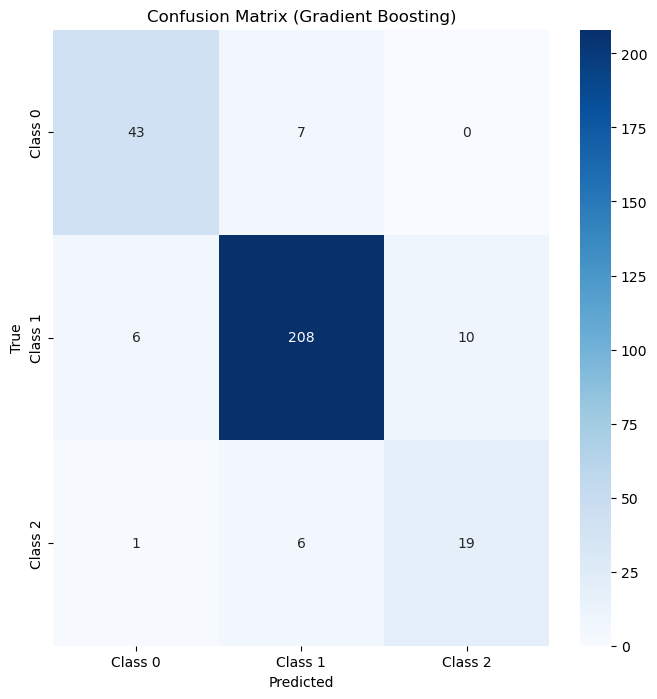

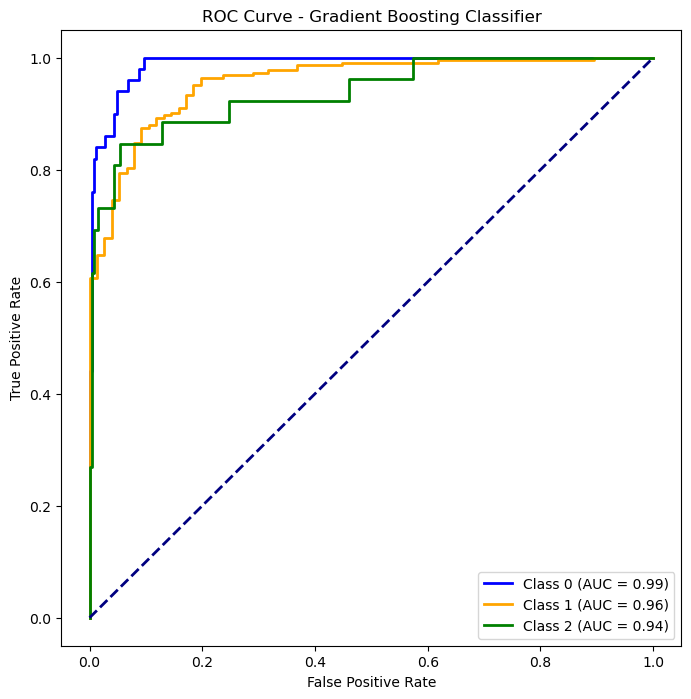

In [53]:
# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Print the results
print(f'Gradient Boosting Accuracy: {accuracy_gb:.2f}')

print('\nGradient Boosting Classification Report:')
print(classification_rep_gb)

# Check the training accuracy
training_accuracy_gb = gb_model.score(X_train_resampled, y_train_resampled)
print(f'Training Accuracy (Gradient Boosting): {training_accuracy_gb:.2f}')

# Check the testing accuracy
testing_accuracy_gb = gb_model.score(X_test, y_test)
print(f'Testing Accuracy (Gradient Boosting): {testing_accuracy_gb:.2f}')

# Generate the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Binarize the labels for multi-class ROC-AUC
y_test_bin_gb = label_binarize(y_test, classes=list(range(3)))  #we have 3 classes

# Get predicted probabilities for each class
y_pred_proba_gb = gb_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()

for i in range(3):  # Assuming we have 3 classes
    fpr_gb[i], tpr_gb[i], _ = roc_curve(y_test_bin_gb[:, i], y_pred_proba_gb[:, i])
    roc_auc_gb[i] = auc(fpr_gb[i], tpr_gb[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))
colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime'])
for i, color in zip(range(3), colors):
    plt.plot(fpr_gb[i], tpr_gb[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc_gb[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()

### <u>Insights:</u>
- The Gradient Boosting model demonstrates strong overall performance with high accuracy and well-balanced precision and recall scores for each class. The AUC scores further highlight the model's ability to discriminate between different classes. Overall, the model appears to be robust and effective in classifying instances in the given dataset for employee performance analysis.

### 11.5 (b) <u>Cross Validation</u>

In [54]:
# Assuming model is your random forest model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

# Use recall as the scoring metric for multiclass (average='weighted' for multiclass)
scorer = make_scorer(recall_score, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(gb_model, X_train_resampled, y_train_resampled, cv=cv, scoring=scorer)

# Display the results
print("Cross-validated scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))
print("Standard deviation of CV scores:", np.std(cross_val_scores))

Cross-validated scores: [0.94102564 0.97179487 0.94358974 0.96410256 0.96410256]
Mean CV score: 0.9569230769230769
Standard deviation of CV scores: 0.012286306205857384


### <u>Insights:</u>
- The Gradient Boosting model exhibits a strong and consistent performance across various cross-validation folds, as indicated by the high mean CV score and low standard deviation.

### 11.5 (c) <u>Hyperparameter tuning</u>

In [85]:
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the scorer (recall in this example)
scorer = make_scorer(recall_score, average='weighted')

# Create the grid search
grid_search = GridSearchCV(gb_classifier, param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_gb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_gb_model.predict(X_test)
recall_best = recall_score(y_test, y_pred_best, average='weighted')
print(f'Recall on the test set with the best model: {recall_best:.2f}')

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Recall on the test set with the best model: 0.91


Gradient Boosting Accuracy: 0.90

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        50
           1       0.94      0.95      0.95       224
           2       0.70      0.73      0.72        26

    accuracy                           0.92       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.92      0.92      0.92       300

Training Accuracy (Gradient Boosting): 1.00
Testing Accuracy (Gradient Boosting): 0.92


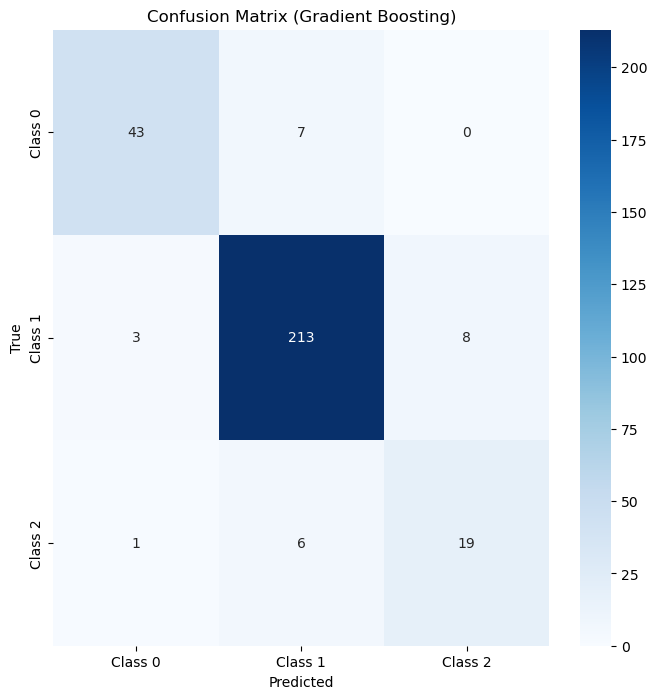

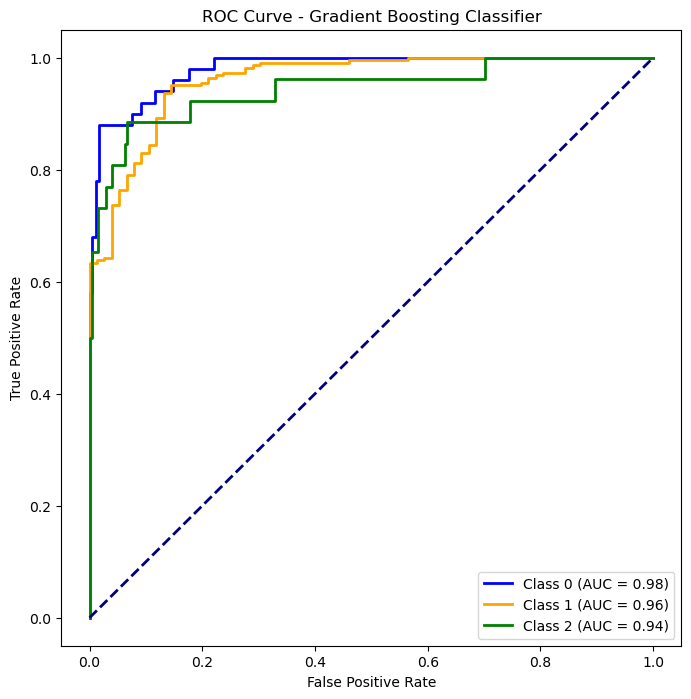

In [55]:
# Replace hyperparameters with the best values
best_params = {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

# Create the final model
best_gb_model = GradientBoostingClassifier(**best_params)

# Train the final model on the entire training dataset
best_gb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_bst = best_gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_tun)
classification_rep_gb = classification_report(y_test, y_pred_bst)

# Print the results
print(f'Gradient Boosting Accuracy: {accuracy_gb:.2f}')

print('\nGradient Boosting Classification Report:')
print(classification_rep_gb)

# Check the training accuracy
training_accuracy_gb = best_gb_model.score(X_train_resampled, y_train_resampled)
print(f'Training Accuracy (Gradient Boosting): {training_accuracy_gb:.2f}')

# Check the testing accuracy
testing_accuracy_gb = best_gb_model.score(X_test, y_test)
print(f'Testing Accuracy (Gradient Boosting): {testing_accuracy_gb:.2f}')

# Generate the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_bst)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Binarize the labels for multi-class ROC-AUC
y_test_bin_gb = label_binarize(y_test, classes=list(range(3)))  # Assuming we have 3 classes

# Get predicted probabilities for each class
y_pred_proba_gb = best_gb_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()

for i in range(3):  # Assuming we have 11 classes
    fpr_gb[i], tpr_gb[i], _ = roc_curve(y_test_bin_gb[:, i], y_pred_proba_gb[:, i])
    roc_auc_gb[i] = auc(fpr_gb[i], tpr_gb[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))
colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime'])
for i, color in zip(range(3), colors):
    plt.plot(fpr_gb[i], tpr_gb[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc_gb[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()

### <u>Insights:</u>
- Performing same as before tuning the hyperparameters.

### 11.5(d) <u>Cross Validation after tuning hyperparameter</u>

In [56]:
# Assuming model is your random forest model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

# Use recall as the scoring metric for multiclass (average='weighted' for multiclass)
scorer = make_scorer(recall_score, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(best_gb_model, X_train_resampled, y_train_resampled, cv=cv, scoring=scorer)

# Display the results
print("Cross-validated scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))
print("Standard deviation of CV scores:", np.std(cross_val_scores))

Cross-validated scores: [0.96153846 0.97692308 0.95641026 0.96410256 0.96410256]
Mean CV score: 0.9646153846153845
Standard deviation of CV scores: 0.006764567158088652


### <u>Insights:</u>
- The cross-validation results reinforce the effectiveness and stability of the Gradient Boosting model on the data.

## 11.6 <u>XGBOOST Classifier</u>

In [57]:
xgb_model = XGBClassifier(random_state=19) 

# Train the model on the training set
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### 11.6 (a) <u>Evaluation Metrics</u>
### <u>Classification Report/ Confusion Matrix/ AUC-ROC Score</u>

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        50
           1       0.95      0.94      0.95       224
           2       0.72      0.81      0.76        26

    accuracy                           0.92       300
   macro avg       0.85      0.88      0.86       300
weighted avg       0.92      0.92      0.92       300

Training Accuracy: 1.00
Testing Accuracy: 0.92


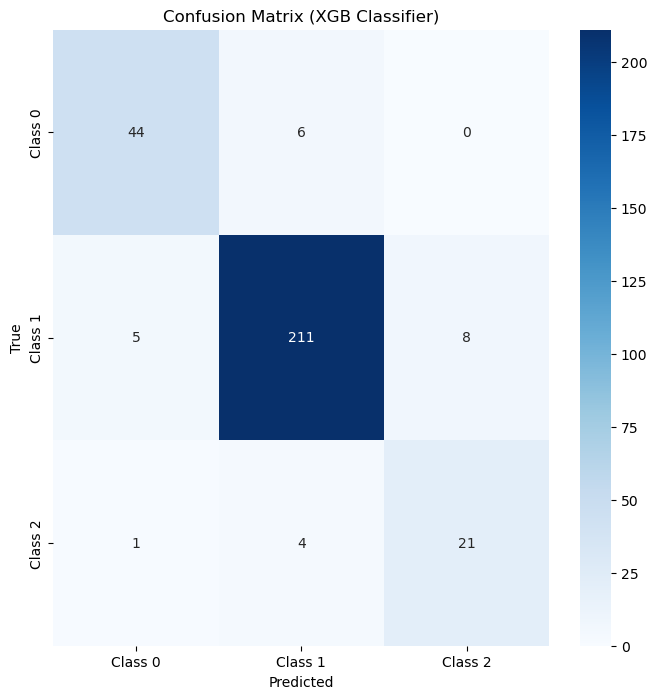

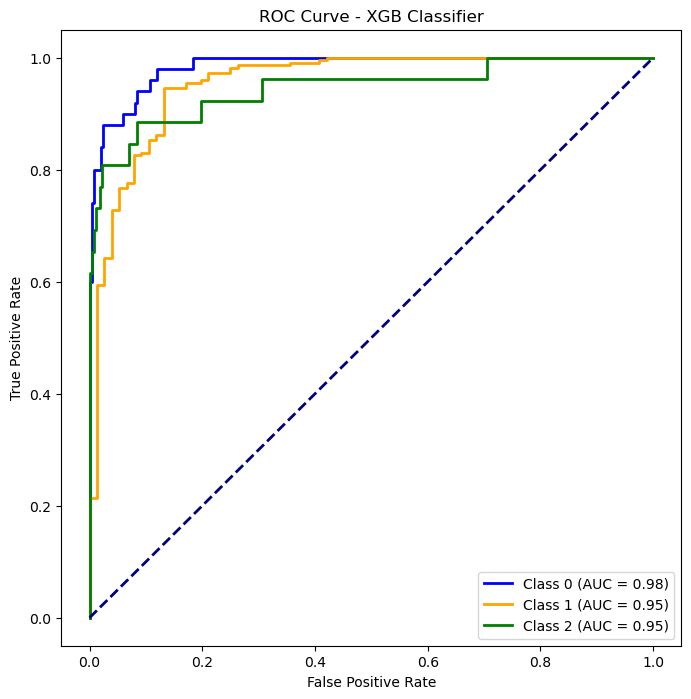

In [58]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred_xgb))

# Check the training accuracy
training_accuracy = xgb_model.score(X_train_resampled, y_train_resampled)
print(f'Training Accuracy: {training_accuracy:.2f}')
# Check the testing accuracy
testing_accuracy = xgb_model.score(X_test, y_test)
print(f'Testing Accuracy: {testing_accuracy:.2f}')

# Generate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (XGB Classifier)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Binarize the labels for multi-class ROC-AUC
y_test_bin_xgb = label_binarize(y_test, classes=list(range(3)))  # Assuming we have 3 classes

# Get predicted probabilities for each class
y_pred_proba_xgb = xgb_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()

for i in range(3):  # Assuming we have 11 classes
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_bin_xgb[:, i], y_pred_proba_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))
colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime'])
for i, color in zip(range(3), colors):
    plt.plot(fpr_xgb[i], tpr_xgb[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc_xgb[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGB Classifier')
plt.legend(loc='lower right')
plt.show()

### <u>Insights</u>
- The confusion matrix reveals the distribution of correct and incorrect predictions for each class. For instance, class 0 has 44 true positives, 6 false negatives, and 0 false positives.
- The XGBOOST model demonstrates strong performance across various evaluation metrics, including accuracy, precision, recall, and AUC scores. The model's ability to achieve high accuracy on the test set, along with robustness in capturing true positives and minimizing false positives and false negatives, makes it a reliable choice for the given dataset.

### 11.6 (b) <u>Cross Validation</u>

In [59]:
# Assuming model is your random forest model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

# Use recall as the scoring metric for multiclass (average='weighted' for multiclass)
scorer = make_scorer(recall_score, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring=scorer)

# Display the results
print("Cross-validated scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))
print("Standard deviation of CV scores:", np.std(cross_val_scores))

Cross-validated scores: [0.95897436 0.97435897 0.95897436 0.97435897 0.96666667]
Mean CV score: 0.9666666666666666
Standard deviation of CV scores: 0.00688020916153779


### <u>Insights:</u>
- Cross-validation scores provide an estimate of the model's generalization performance. A high mean CV score and low standard deviation are desirable characteristics, indicating a robust and reliable model.


### 11.6(c) <u>Hypertuning Parameters

In [ ]:
# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5, 1],
    'reg_alpha': [0, 0.1, 0.5, 1, 5],
    'reg_lambda': [0, 0.1, 0.5, 1, 5],
}

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Define the scorer (recall in this example)
scorer = make_scorer(recall_score, average='weighted')

# Create the grid search
grid_search = GridSearchCV(xgb_model, param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_xgb_model.predict(X_test)
recall_best = recall_score(y_test, y_pred_best, average='weighted')
print(f'Recall on the test set with the best model: {recall_best:.2f}')

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        50
           1       0.95      0.95      0.95       224
           2       0.71      0.77      0.74        26

    accuracy                           0.92       300
   macro avg       0.85      0.86      0.85       300
weighted avg       0.92      0.92      0.92       300

Training Accuracy: 0.96
Testing Accuracy: 0.92


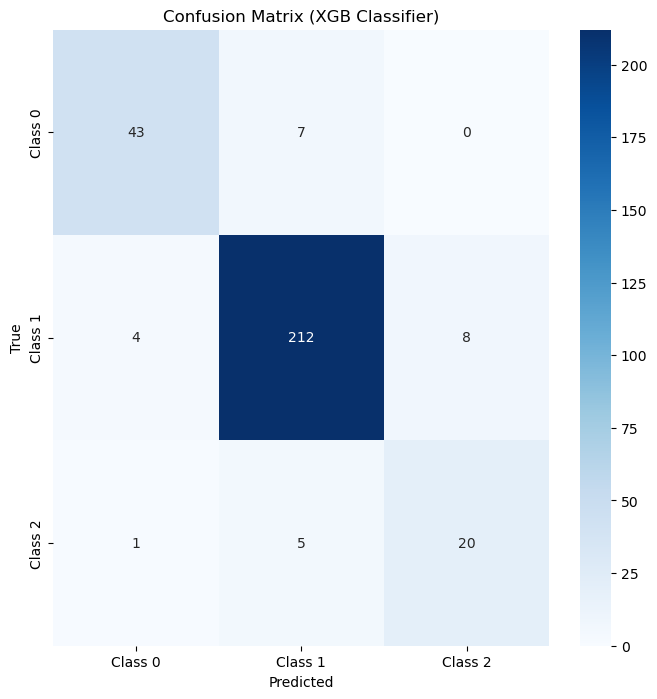

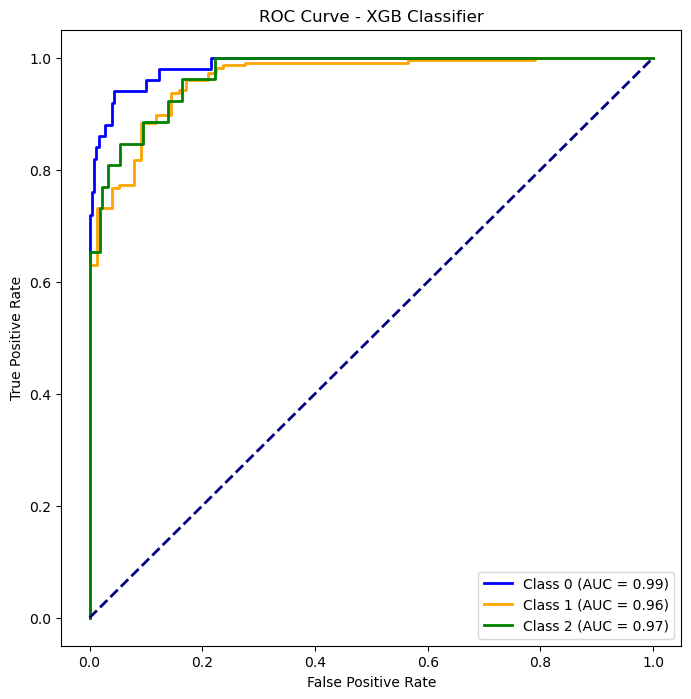

In [60]:
best_params= {'learning_rate': 0.01,'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.9,
    'colsample_bytree': 0.8,'gamma': 1.0,'reg_alpha': 0.1,'reg_lambda': 5}

# Create the final model
best_xgb_model = XGBClassifier(**best_params, random_state=19)

# Train the final model on the entire training dataset
best_xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_bst = best_xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_bst)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred_bst))

# Check the training accuracy
training_accuracy = best_xgb_model.score(X_train_resampled, y_train_resampled)
print(f'Training Accuracy: {training_accuracy:.2f}')
# Check the testing accuracy
testing_accuracy = best_xgb_model.score(X_test, y_test)
print(f'Testing Accuracy: {testing_accuracy:.2f}')

# Generate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_bst)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (XGB Classifier)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Binarize the labels for multi-class ROC-AUC
y_test_bin_xgb = label_binarize(y_test, classes=list(range(3)))  # Assuming we have 3 classes

# Get predicted probabilities for each class
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()

for i in range(3):  # Assuming we have 11 classes
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_bin_xgb[:, i], y_pred_proba_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))
colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'lime'])
for i, color in zip(range(3), colors):
    plt.plot(fpr_xgb[i], tpr_xgb[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc_xgb[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGB Classifier')
plt.legend(loc='lower right')
plt.show()

In [76]:
cm_xgb

array([[ 43,   7,   0],
       [  4, 212,   8],
       [  1,   5,  20]], dtype=int64)

### <u>Insights:
    - The fine-tuned XGBoost model demonstrates strong performance across multiple evaluation metrics. It achieves high accuracy, precision, recall, and AUC scores. The model appears to generalize well to new data, and its ability to discriminate between classes is robust. Fine-tuning has likely improved the model's performance compared to its initial configuration.

### 11.6(d) CV Score after hyperparameter tuning

In [61]:
# Assuming model is your random forest model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

# Use recall as the scoring metric for multiclass (average='weighted' for multiclass)
scorer = make_scorer(recall_score, average='weighted')

# Perform cross-validation
cross_val_scores = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring=scorer)

# Display the results
print("Cross-validated scores:", cross_val_scores)
print("Mean CV score:", np.mean(cross_val_scores))
print("Standard deviation of CV scores:", np.std(cross_val_scores))

Cross-validated scores: [0.92051282 0.95384615 0.93589744 0.94102564 0.91282051]
Mean CV score: 0.9328205128205129
Standard deviation of CV scores: 0.014631120633525266


### <u>Insights:
    - The XGBoost model, after fine-tuning, demonstrates a strong and consistent performance, as reflected in the mean cross-validated score and low standard deviation. These results indicate that the model is well-tuned and generalizes effectively to unseen data, we can choose XGBOOST Classifier model as our best choice for production.

## 12. <u>Metrics Comparison</u>

In [62]:
# Data for the table
data = {
    'Model': ['Logistic Regression Before Tuning', 'KNN Before Tuning', 'KNN After Tuning',
              'SVC Before Tuning', 'SVC After Tuning', 'RF Before Tuning', 'RF After Tuning',
              'GB Before Tuning', 'GB After Tuning', 'XGBoost Before Tuning', 'XGBoost After Tuning'],
    
    'Training Accuracy': [0.84, 0.88, 1.00, 0.86, 0.74, 1.00, 1.00, 0.99, 1.00, 1.00, 0.96],
    
    'Testing Accuracy': [0.74, 0.55, 0.57, 0.73, 0.66, 0.90, 0.90, 0.90, 0.91, 0.92, 0.92],
    
    'Weighted Avg. Recall': [0.74, 0.55, 0.57, 0.73, 0.66, 0.90, 0.90, 0.90, 0.91, 0.92, 0.92],
    
    'CV Score': [0.83, 0.81, 0.85, 0.833, 0.72, 0.927, 0.963, 0.95, 0.964, 0.9666, 0.932],
    
    'ROC Class 0': [0.90, 0.75, 0.76, 0.90, 0.88, 0.99, 0.99, 0.99, 0.98, 0.98, 0.99],
    
    'ROC Class 1': [0.83, 0.66, 0.66, 0.80, 0.75, 0.95, 0.95, 0.96, 0.96, 0.95, 0.96],
    
    'ROC Class 2': [0.88, 0.88, 0.61, 0.79, 0.70, 0.95, 0.95, 0.95, 0.95, 0.95, 0.97]
}

# Create DataFrame
df = pd.DataFrame(data)

# Styling the dataframe for better visualization
styled_df = df.style\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])\
    .set_caption('Metrics Comparison - Weighted Avg.(Recall)')\

# Display the styled dataframe
styled_df

### <u>Insights:</u>
- The choice between the model before tuning and after tuning depends on the trade-off between model performance, interpretability, and computational resources. If the tuned model significantly outperforms the initial model and the computational cost is acceptable, the XGBOOST tuned model is a better choice. However, if the initial model already meets our requirements and computational resources are limited, the initial model might still be a reasonable choice.

- If computational resources are a significant concern, and the performance metrics were satisfactory before tuning, we might opt for the model before tuning. This is especially true if the initial model meets our business objectives and requirements.

- If model performance is critical and computational resources are not a limiting factor, the tuned model may be preferred, as it likely provides better accuracy and generalization.
#### From the above metrics comparison, we can see the XGBOOST classifier model is performing in a  more generalized way, after fine tuning it has training accuracy of 96%, testing accuracy of 92%, Weighted Avg.(Recall) of 92%, Cross Validation Score of 93%, and ROC score for class 0 is 99%, class1 is 96%, class2 is 97%, which indicates it will give stable performance in real world. 

### 13.<u> Now, lets see what is expected out of this Project, and answer them step by step after intensive analysis and model building:</u>
#### The following insights are expected from this project:
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

### 13.1 <u>Department-wise Performances:</u>

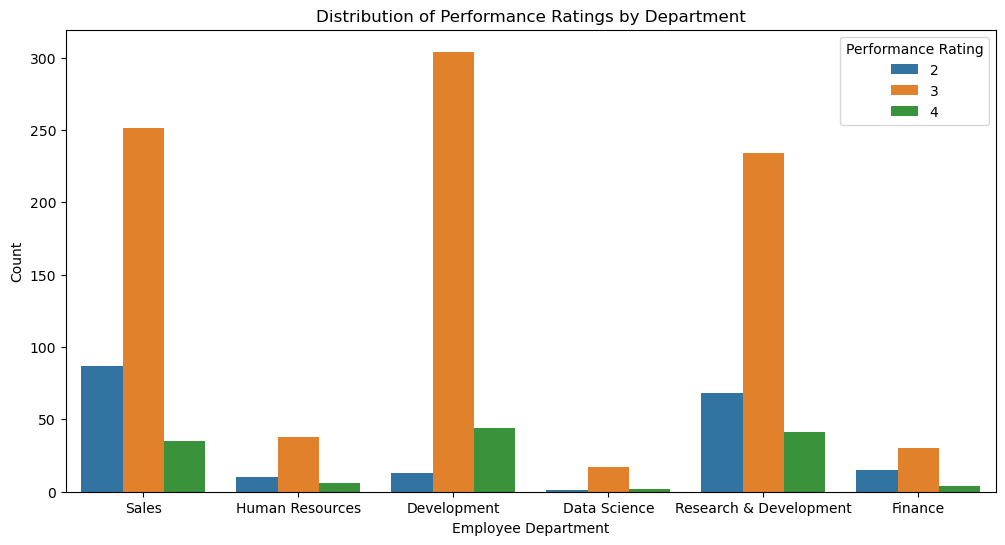

In [63]:
# Assuming 'epa' is your DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=epa)
plt.title('Distribution of Performance Ratings by Department')
plt.xlabel('Employee Department')
plt.ylabel('Count')
plt.legend(title='Performance Rating')
plt.show()

### <u>Insights:</u>
- The majority of our workforce is concentrated in the Development department, where an impressive 85% of employees excel in their performance. Notably, a few fall into the Good and Outstanding categories.

- Following closely is the Sales department, where 64% of employees exhibit excellent performance, with an additional 36% falling within the combined Good and Outstanding categories. Meanwhile, in the R&D department, 70% of employees are recognized as excellent performers.

- The HR department, although contributing a smaller count to our overall workforce, stands out with 75% of its employees delivering excellent performance. Finance, with a comparatively lower employee count, boasts a 50% rate of excellent performers. In contrast, the Data Science department, though having the fewest employees, showcases an outstanding 90% of top performers.

### 13.2. <u>Top 3 Important Factors effecting Employee Performances:</u>

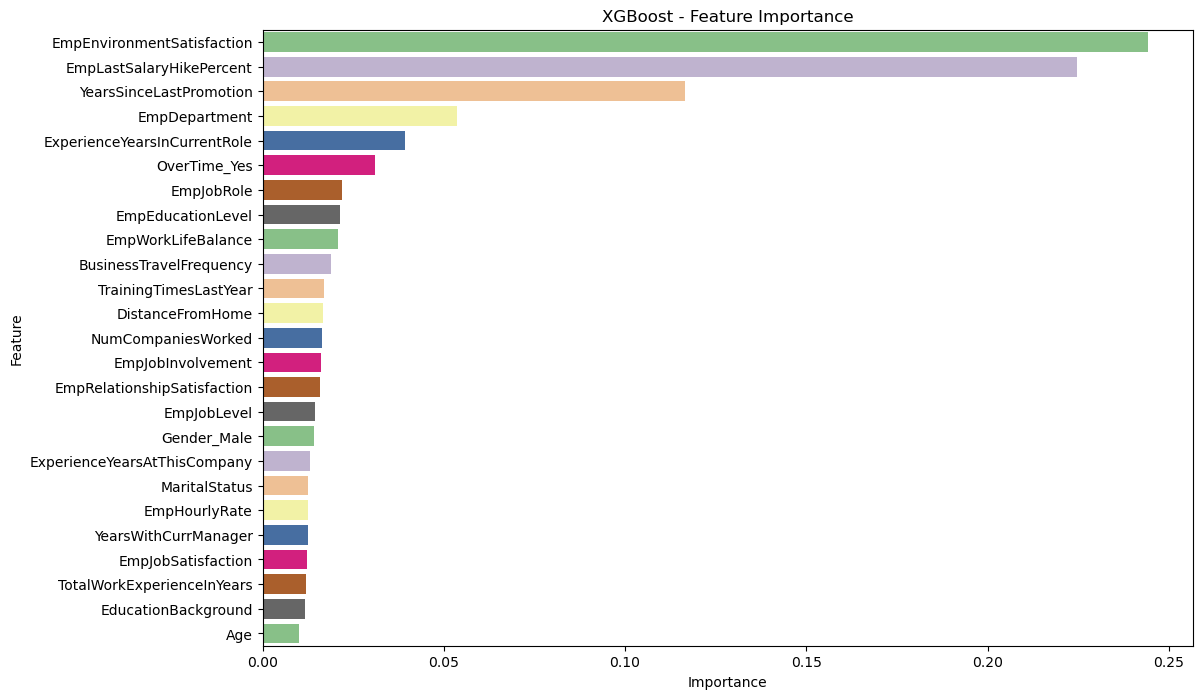

In [64]:
# Get feature importances from the trained model
feature_importances = best_xgb_model.feature_importances_

# Get feature names
feature_names = X_train_resampled.columns  # Replace this with your actual feature names

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Accent')
plt.title('XGBoost - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### <u>Insights:</u>
#### The top three important factors affecting employee performance:
#### 1. Employee Environment Satisfaction (Importance Score: 24.43%):
The level of satisfaction employees derive from their work environment holds the highest importance, as indicated by a substantial score of 24.43%. A positive and conducive work atmosphere significantly contributes to higher morale, engagement, and, consequently, superior performance. Ensuring a supportive and satisfying workplace should be a priority for enhancing overall employee effectiveness.
#### 2. Employee Last Salary Hike Percentage (Importance Score: 22.48%):
Financial incentives, particularly the last salary hike percentage, emerge as a critical factor influencing employee performance, with a significant importance score of 22.48%. Adequate and timely salary adjustments not only recognize individual contributions but also serve as a powerful motivator, fostering sustained commitment and heightened job performance.
#### 3. Years Since Last Promotion (Importance Score: 11.65%):
The duration since an employee's last promotion is identified as another noteworthy determinant of performance, with an importance score of 11.65%. This underscores the significance of career growth and professional advancement in stimulating employee productivity. Periodic promotions not only acknowledge achievements but also inspire employees to continually strive for excellence.
These insights gleaned from the XGBoost model's feature importance scores provide strategic guidance for management(CEO-Mr. Brain) to prioritize efforts in fostering a positive work environment, ensuring fair and competitive compensation structures, and implementing effective career development plans to elevate employee performance across the organization.


### 13.3 <u>A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees</u>

### <u>Model Comparison</u>

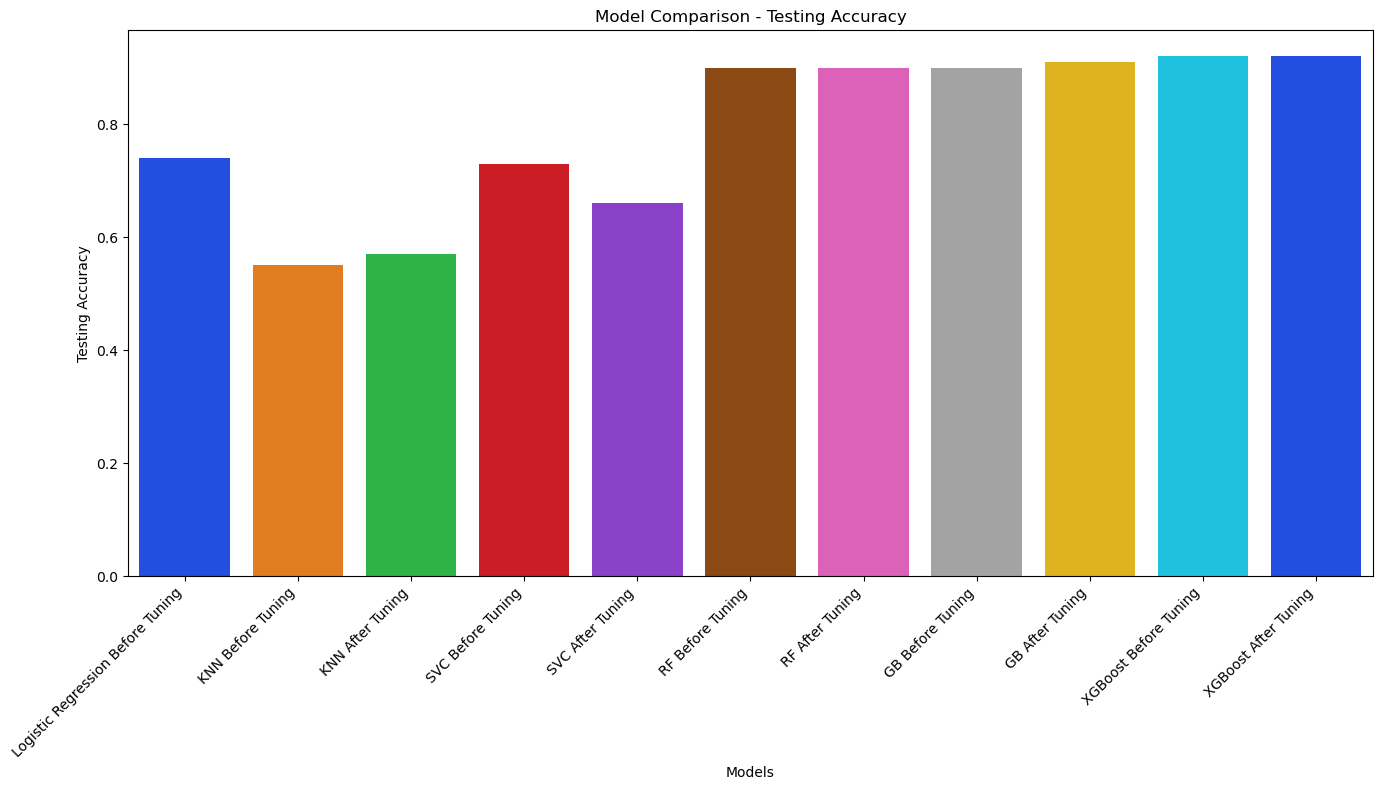

In [65]:
# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Model', y='Testing Accuracy', palette='bright')
plt.title('Model Comparison - Testing Accuracy')
plt.xticks(rotation=45, ha='right')

# Customize the appearance
plt.xlabel('Models')
plt.ylabel('Testing Accuracy')
plt.tight_layout()
plt.show()

### <u>Insights:</u>
#### The ensemble models, including Random Forest, Gradient Boosting, and XGBoost, are exhibiting exceptional performance in the model comparison, but we will go with XGBOOST model as our best choice for more generalized performance.
- In the process of hiring employees, our trained machine learning models, particularly the tuned Random Forest (RF) and XGBoost models, play a crucial role. These models, developed using historical employee data, have demonstrated high accuracy in predicting employee performance based on various factors such as education background, job role, work environment satisfaction, and more.

- The testing accuracy, cross-validated scores, and area under the ROC curve (AUC-ROC) values provide insights into the robustness and reliability of each model. A higher testing accuracy and AUC-ROC indicate the model's capability to predict employee performance effectively.

- With these models in place, the HR department can utilize the input features of potential candidates to generate predictions on their likely performance levels. This predictive analytics approach enables a data-driven hiring process, aiding in the identification of candidates who are more likely to excel in their roles.

- Moreover, the feature importance analysis highlights the key factors influencing employee performance. For instance, in the XGBoost model, factors such as 'Employee Environment Satisfaction,' 'Last Salary Hike Percent,' and 'Years Since Last Promotion' have been identified as the most crucial contributors.

- In conclusion, our machine learning models not only provide accurate predictions but also offer transparency by revealing the importance of various factors. This empowers the HR team to make informed decisions in the hiring process, ultimately contributing to the organization's overall success in employee performance and satisfaction."

### 13.4 <u>Recommendations to improve the employee performance based on insights from analysis.</u>

Based on the comprehensive analysis conducted on employee data at INX Future Inc., several key insights have been identified to enhance employee performance. The following recommendations are tailored to address specific areas that can positively impact overall performance and contribute to organizational success:

#### Prioritize Employee Work Environment:
Recognizing the high importance score (24.43%) of Employee Environment Satisfaction, it is crucial to focus on creating a positive and supportive work environment.
Implement initiatives that enhance workplace culture, foster collaboration, and provide resources to improve job satisfaction.
Regularly assess employee feedback to identify areas for improvement and promptly address concerns related to the work environment.
#### Optimize Compensation Structures:
Acknowledging the significant influence of Employee Last Salary Hike Percentage (22.48%) on performance, management should review and optimize compensation structures.
Conduct regular salary reviews to ensure competitiveness within the industry and align with employees' contributions and market standards.
Transparent communication regarding salary adjustments and performance-based incentives can contribute to increased motivation and commitment.
#### Focus on Career Development Opportunities:
Considering the impact of Years Since Last Promotion (11.65%) on performance, emphasize career development opportunities for employees.
Implement structured career advancement programs, mentorship initiatives, and training sessions to nurture professional growth.
Provide clear pathways for promotion, recognizing and rewarding employees for their accomplishments and fostering a culture of continuous learning.
#### Department-Specific Strategies:
Tailor strategies based on departmental insights to address specific needs and challenges.
For example, in the Development department, maintaining the positive performance trend could involve further investment in collaborative tools and training programs.
In the Sales department, strategies could focus on recognizing and rewarding high-performing sales executives to drive continued excellence.
#### Regular Monitoring and Adaptation:
Establish a system for regular monitoring of employee satisfaction, compensation structures, and career development progress.
Be agile in adapting strategies based on evolving employee needs and market trends.
Encourage open communication channels to gather feedback and insights from employees, facilitating a responsive and adaptive organizational culture.
By strategically implementing these recommendations, INX Future Inc. can foster a work environment that promotes employee satisfaction, recognizes contributions through competitive compensation, and supports continuous career development. These efforts are expected to result in improved employee performance and contribute to the overall success and growth of the organization.

## 14. <u>Challenges Faced:</u>
1. During the preprocessing stage, it was challenging to determine at which step it would be appropriate to handle the transformation. After conducting research, it was found that when using scaling methods like Min-Max and standard scaling, it must be done after handling outliers. If robust scaling is applied, it should be done before handling outliers.

2. The approach involved trial and error to find the technique that provides optimal results. For instance, using standard scaling resulted in a performance decrease by 3 units and was not satisfactory with robust scaling. Consequently, MinMax scaling was chosen for our dataset.

3. Difficulty arose in deciding whether to drop any columns due to their data context.

4. Balancing the tradeoff between type 1 and type 2 errors presented a challenge. Strategies needed to be implemented to reduce the occurrence of these errors based on the specific goals and priorities of the organization.

5. Imbalanced Data: Dealing with imbalanced data distribution can pose challenges, particularly when certain performance categories have significantly fewer instances than others.

6. Feature Engineering: Identifying and engineering relevant features for predicting employee performance can be complex and require a deep understanding of the domain.

7. Model Interpretability: Interpreting complex models like XGBoost may be challenging, especially when providing explanations and documented them.


### Project given by IABAC,
- Submitted by:- Priya Srivastava,
- DataMites™ Solutions Pvt Ltd
- Registered Trainer: Ashok Kumar A
- Certified Data Scientist - Project